# Data Loading
This section imports necessary libraries and loads datasets (e.g., `train.csv` and `test.csv`) for analysis and modeling. Ensure the files are in the correct path.

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [152]:
train_df.head()

,trip_ID,visitor_nation,age_bracket,travelling_with,female_count,male_count,key_activity,trip_purpose,first_time_visitor,mainland_nights,...,food_package,transport_package_mx,sightseeing_package,guided_tour_package,insurance_package,days_before_booked,weather_at_arrival,tour_length,special_requirements,category
0,tour_idftaa27vp,FRANCE,45-64,With Spouse and Children,1.0,2.0,Beach Tourism,Leisure and Holidays,Yes,0,...,No,No,No,No,No,NaN,"cloudy,",30+,NaN,1.0
1,tour_iduck75m57,KENYA,45-64,Alone,1.0,0.0,Conference Tourism,Meetings and Conference,Yes,6,...,No,No,No,No,No,15-30,"sunny,",30+,NaN,2.0
2,tour_id8y3w40h8,SOUTH AFRICA,25-44,With Other Friends/Relatives,2.0,0.0,Cultural Tourism,Meetings and Conference,No,4,...,No,No,No,No,No,90+,"sunny,",30+,none,2.0
3,tour_idkoh8mkgr,ITALY,25-44,With Spouse,1.0,1.0,Widlife Tourism,Leisure and Holidays,Yes,0,...,Yes,Yes,Yes,Yes,No,8-14,NaN,NaN,none,0.0
4,tour_idkmsfa00a,ITALY,25-44,With Spouse,1.0,1.0,Beach Tourism,Leisure and Holidays,Yes,0,...,Yes,No,No,No,No,90+,"sunny,",7-14,NaN,0.0


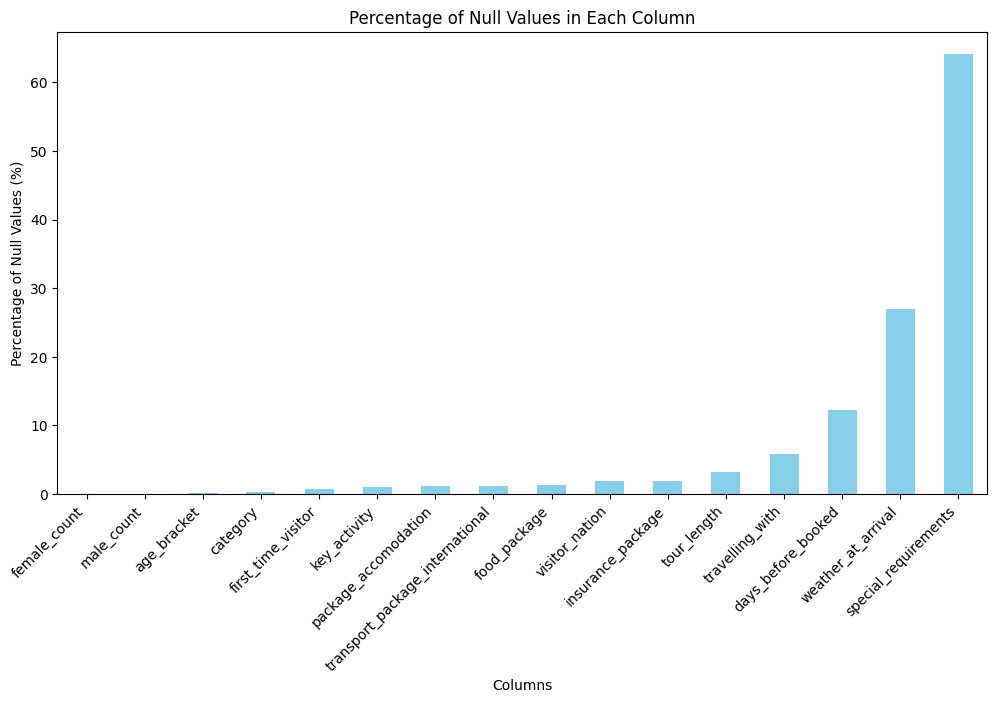

In [153]:
null_percent = train_df.isnull().mean() * 100  # Calculate the percentage of null values
null_percent = null_percent[null_percent > 0]  # Filter only columns with null values

# Plotting
plt.figure(figsize=(12, 6))
null_percent.sort_values().plot(kind='bar', color='skyblue')
plt.title('Percentage of Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Null Values (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Exploratory Data Analysis (EDA)
EDA is performed to understand the structure of the dataset, identify missing values, and explore patterns. Key steps include:
- Checking for null values and their percentages.
- Identifying numeric and categorical columns.
- Visualizing data distributions.

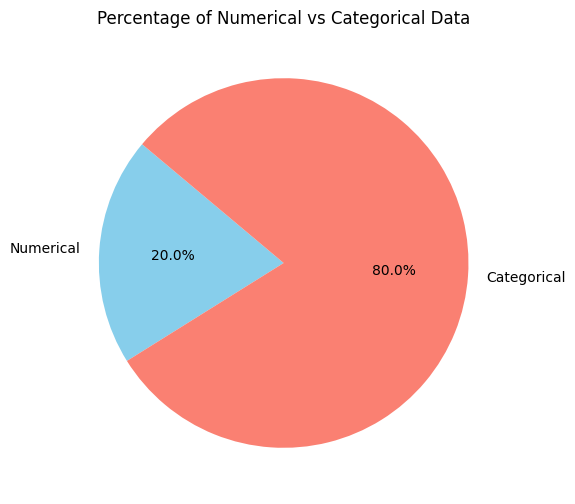

In [154]:
num_cols = train_df.select_dtypes(include=['number']).shape[1]
cat_cols = train_df.select_dtypes(include=['object', 'category']).shape[1]

# Calculate the percentage
total_cols = train_df.shape[1]
percentages = [num_cols / total_cols * 100, cat_cols / total_cols * 100]
labels = ['Numerical', 'Categorical']

# Plotting
plt.figure(figsize=(6, 6))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Percentage of Numerical vs Categorical Data')
plt.show()

In [155]:
train_df['category'].fillna(train_df['category'].median(), inplace=True)

C:\Users\SIDDESHWAR\AppData\Local\Temp\ipykernel_26400\2372023303.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['category'].fillna(train_df['category'].median(), inplace=True)


In [156]:
train_df = train_df.drop(columns = ['trip_ID','travelling_with','trip_purpose','first_time_visitor','source_of_info','weather_at_arrival','tour_arrangement','special_requirements'])
test_df = test_df.drop(columns = ['trip_ID','travelling_with','trip_purpose','first_time_visitor','source_of_info','weather_at_arrival','tour_arrangement','special_requirements'])

In [157]:
train_df['total_nights'] = train_df['mainland_nights'] + train_df['island_nights']
test_df['total_nights'] = test_df['mainland_nights'] + test_df['island_nights']

In [158]:
train_df.head()

,visitor_nation,age_bracket,female_count,male_count,key_activity,mainland_nights,island_nights,transport_package_international,package_accomodation,food_package,transport_package_mx,sightseeing_package,guided_tour_package,insurance_package,days_before_booked,tour_length,category,total_nights
0,FRANCE,45-64,1.0,2.0,Beach Tourism,0,7,No,No,No,No,No,No,No,NaN,30+,1.0,7
1,KENYA,45-64,1.0,0.0,Conference Tourism,6,0,No,No,No,No,No,No,No,15-30,30+,2.0,6
2,SOUTH AFRICA,25-44,2.0,0.0,Cultural Tourism,4,2,No,No,No,No,No,No,No,90+,30+,2.0,6
3,ITALY,25-44,1.0,1.0,Widlife Tourism,0,7,No,Yes,Yes,Yes,Yes,Yes,No,8-14,NaN,0.0,7
4,ITALY,25-44,1.0,1.0,Beach Tourism,0,7,Yes,Yes,Yes,No,No,No,No,90+,7-14,0.0,7


In [159]:
from sklearn.model_selection import KFold
import pandas as pd

# Function to apply target encoding with K-Fold
def target_encode_column(train_df, test_df, target, col, n_splits=5):
    # Create Series to store the target-encoded values for train and test
    train_encoded = pd.Series(index=train_df.index, dtype='float64')
    test_encoded = pd.Series(index=test_df.index, dtype='float64')

    # Set up K-Fold for target encoding on the train set
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    for train_idx, valid_idx in kf.split(train_df):
        # Train and validation folds
        train_fold, valid_fold = train_df.iloc[train_idx], train_df.iloc[valid_idx]

        # Calculate target mean per category in train fold
        means = train_fold.groupby(col)[target].mean()

        # Map these means to the validation fold
        train_encoded.iloc[valid_idx] = valid_fold[col].map(means)

    # Fill missing values in train_encoded with the overall target mean
    train_encoded.fillna(train_df[target].mean(), inplace=True)

    # Map the target encoding means to the test set
    category_means = train_df.groupby(col)[target].mean()
    test_encoded = test_df[col].map(category_means)

    # Fill missing values in test_encoded with the overall target mean
    test_encoded.fillna(train_df[target].mean(), inplace=True)

    return train_encoded, test_encoded

# Apply target encoding on 'visitor_nation'
train_df['visitor_nation_encoded'], test_df['visitor_nation_encoded'] = target_encode_column(train_df, test_df, target='category', col='visitor_nation')

# Drop the original 'visitor_nation' column if not needed further
train_df = train_df.drop(columns=['visitor_nation'])
test_df = test_df.drop(columns=['visitor_nation'])

# Display first few rows to verify the encoding
train_df[['visitor_nation_encoded', 'category']].head(), test_df[['visitor_nation_encoded']].head()


(   visitor_nation_encoded  category
 0                0.270869       1.0
 1                1.253133       2.0
 2                0.696833       2.0
 3                0.282976       0.0
 4                0.284483       0.0,
    visitor_nation_encoded
 0                1.500000
 1                0.436170
 2                0.500000
 3                0.823529
 4                0.428986)

In [160]:
train_df['total_people'] = train_df['female_count'] + train_df['male_count']
test_df['total_people'] = test_df['female_count'] + test_df['male_count']

In [161]:
# 1. Average group size
train_df['average_group_size'] = train_df['total_people'] / train_df['total_nights']
test_df['average_group_size'] = test_df['total_people'] / test_df['total_nights']

# 2. Trip duration categories
train_df['trip_duration_category'] = pd.cut(train_df['total_nights'], bins=[0, 3, 7, float('inf')], labels=['short', 'medium', 'long'])
test_df['trip_duration_category'] = pd.cut(test_df['total_nights'], bins=[0, 3, 7, float('inf')], labels=['short', 'medium', 'long'])

# 3. Visitor demographics (family and group indicators)
train_df['is_family'] = ((train_df['female_count'] > 0) & (train_df['male_count'] > 0)).astype(int)
test_df['is_family'] = ((test_df['female_count'] > 0) & (test_df['male_count'] > 0)).astype(int)

train_df['is_group'] = (train_df['total_people'] > 2).astype(int)
test_df['is_group'] = (test_df['total_people'] > 2).astype(int)

# 4. Days in each type of location (mainland/island ratios)
train_df['mainland_ratio'] = train_df['mainland_nights'] / train_df['total_nights']
train_df['island_ratio'] = train_df['island_nights'] / train_df['total_nights']

test_df['mainland_ratio'] = test_df['mainland_nights'] / test_df['total_nights']
test_df['island_ratio'] = test_df['island_nights'] / test_df['total_nights']

In [162]:
train_df.head()

,age_bracket,female_count,male_count,key_activity,mainland_nights,island_nights,transport_package_international,package_accomodation,food_package,transport_package_mx,...,category,total_nights,visitor_nation_encoded,total_people,average_group_size,trip_duration_category,is_family,is_group,mainland_ratio,island_ratio
0,45-64,1.0,2.0,Beach Tourism,0,7,No,No,No,No,...,1.0,7,0.270869,3.0,0.428571,medium,1,1,0.000000,1.000000
1,45-64,1.0,0.0,Conference Tourism,6,0,No,No,No,No,...,2.0,6,1.253133,1.0,0.166667,medium,0,0,1.000000,0.000000
2,25-44,2.0,0.0,Cultural Tourism,4,2,No,No,No,No,...,2.0,6,0.696833,2.0,0.333333,medium,0,0,0.666667,0.333333
3,25-44,1.0,1.0,Widlife Tourism,0,7,No,Yes,Yes,Yes,...,0.0,7,0.282976,2.0,0.285714,medium,1,0,0.000000,1.000000
4,25-44,1.0,1.0,Beach Tourism,0,7,Yes,Yes,Yes,No,...,0.0,7,0.284483,2.0,0.285714,medium,1,0,0.000000,1.000000


# Feature Engineering
Feature extraction and transformation are critical to improving model performance. This section includes:
- Handling missing values.
- Encoding categorical variables.
- Scaling numerical features.
- Creating new features, if applicable.

In [163]:
train_df = train_df.drop(columns = ['female_count','male_count','mainland_nights','island_nights'])
test_df = test_df.drop(columns = ['female_count','male_count','mainland_nights','island_nights'])

In [164]:
train_df['key_activity'] = train_df['key_activity'].replace('Widlife Tourism', 'Wildlife Tourism')
test_df['key_activity'] = test_df['key_activity'].replace('Widlife Tourism', 'Wildlife Tourism')

In [165]:
train_df.head()

,age_bracket,key_activity,transport_package_international,package_accomodation,food_package,transport_package_mx,sightseeing_package,guided_tour_package,insurance_package,days_before_booked,...,category,total_nights,visitor_nation_encoded,total_people,average_group_size,trip_duration_category,is_family,is_group,mainland_ratio,island_ratio
0,45-64,Beach Tourism,No,No,No,No,No,No,No,NaN,...,1.0,7,0.270869,3.0,0.428571,medium,1,1,0.000000,1.000000
1,45-64,Conference Tourism,No,No,No,No,No,No,No,15-30,...,2.0,6,1.253133,1.0,0.166667,medium,0,0,1.000000,0.000000
2,25-44,Cultural Tourism,No,No,No,No,No,No,No,90+,...,2.0,6,0.696833,2.0,0.333333,medium,0,0,0.666667,0.333333
3,25-44,Wildlife Tourism,No,Yes,Yes,Yes,Yes,Yes,No,8-14,...,0.0,7,0.282976,2.0,0.285714,medium,1,0,0.000000,1.000000
4,25-44,Beach Tourism,Yes,Yes,Yes,No,No,No,No,90+,...,0.0,7,0.284483,2.0,0.285714,medium,1,0,0.000000,1.000000


In [166]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   age_bracket                      12646 non-null  object  
 1   key_activity                     12526 non-null  object  
 2   transport_package_international  12507 non-null  object  
 3   package_accomodation             12511 non-null  object  
 4   food_package                     12483 non-null  object  
 5   transport_package_mx             12654 non-null  object  
 6   sightseeing_package              12654 non-null  object  
 7   guided_tour_package              12654 non-null  object  
 8   insurance_package                12418 non-null  object  
 9   days_before_booked               11101 non-null  object  
 10  tour_length                      12252 non-null  object  
 11  category                         12654 non-null  float64 
 12  tota

array([[<Axes: title={'center': 'total_nights'}>]], dtype=object)

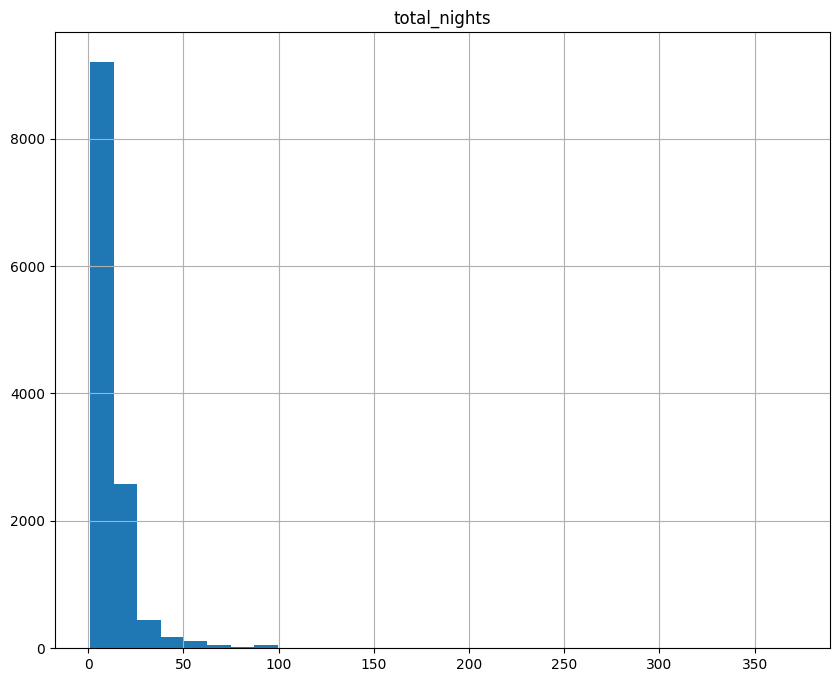

In [167]:
train_df[[ 'tour_length', 'days_before_booked', 'total_nights']].hist(bins=30, figsize=(10, 8))

In [168]:
train_df.isna().sum()

age_bracket                           8
key_activity                        128
transport_package_international     147
package_accomodation                143
food_package                        171
transport_package_mx                  0
sightseeing_package                   0
guided_tour_package                   0
insurance_package                   236
days_before_booked                 1553
tour_length                         402
category                              0
total_nights                          0
visitor_nation_encoded                0
total_people                          6
average_group_size                    6
trip_duration_category                0
is_family                             0
is_group                              0
mainland_ratio                        0
island_ratio                          0
dtype: int64

In [169]:
mode_key_activity = train_df['key_activity'].mode()[0]

train_df['key_activity'].fillna(mode_key_activity, inplace=True)
test_df['key_activity'].fillna(mode_key_activity, inplace=True)

C:\Users\SIDDESHWAR\AppData\Local\Temp\ipykernel_26400\2338379616.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['key_activity'].fillna(mode_key_activity, inplace=True)
C:\Users\SIDDESHWAR\AppData\Local\Temp\ipykernel_26400\2338379616.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [170]:
train_df.isna().sum()

age_bracket                           8
key_activity                          0
transport_package_international     147
package_accomodation                143
food_package                        171
transport_package_mx                  0
sightseeing_package                   0
guided_tour_package                   0
insurance_package                   236
days_before_booked                 1553
tour_length                         402
category                              0
total_nights                          0
visitor_nation_encoded                0
total_people                          6
average_group_size                    6
trip_duration_category                0
is_family                             0
is_group                              0
mainland_ratio                        0
island_ratio                          0
dtype: int64

In [171]:
import numpy as np

# Model Training
This section involves training machine learning models. Key highlights:
- Hyperparameter tuning using **Optuna**, an optimization framework.
- Splitting the data into training and validation sets.
- Logging results for comparisons.

In [172]:
train_df.head()

,age_bracket,key_activity,transport_package_international,package_accomodation,food_package,transport_package_mx,sightseeing_package,guided_tour_package,insurance_package,days_before_booked,...,category,total_nights,visitor_nation_encoded,total_people,average_group_size,trip_duration_category,is_family,is_group,mainland_ratio,island_ratio
0,45-64,Beach Tourism,No,No,No,No,No,No,No,NaN,...,1.0,7,0.270869,3.0,0.428571,medium,1,1,0.000000,1.000000
1,45-64,Conference Tourism,No,No,No,No,No,No,No,15-30,...,2.0,6,1.253133,1.0,0.166667,medium,0,0,1.000000,0.000000
2,25-44,Cultural Tourism,No,No,No,No,No,No,No,90+,...,2.0,6,0.696833,2.0,0.333333,medium,0,0,0.666667,0.333333
3,25-44,Wildlife Tourism,No,Yes,Yes,Yes,Yes,Yes,No,8-14,...,0.0,7,0.282976,2.0,0.285714,medium,1,0,0.000000,1.000000
4,25-44,Beach Tourism,Yes,Yes,Yes,No,No,No,No,90+,...,0.0,7,0.284483,2.0,0.285714,medium,1,0,0.000000,1.000000


In [173]:
train_df.shape

(12654, 21)

In [174]:
import numpy as np

# Define mappings for range values to approximate numeric values
days_before_booked_map = {
    '1-7': 4,
    '8-14': 11,
    '15-30': 22.5,
    '31-60': 45.5,
    '61-90': 75.5,
    '90+': 90
}

tour_length_map = {
    '1-6': 3.5,
    '7-14': 10.5,
    '15-29': 22,
    '30+': 30
}

# Apply mappings to convert ranges to numeric values
train_df['days_before_booked_num'] = train_df['days_before_booked'].map(days_before_booked_map)
test_df['days_before_booked_num'] = test_df['days_before_booked'].map(days_before_booked_map)

train_df['tour_length_num'] = train_df['tour_length'].map(tour_length_map)
test_df['tour_length_num'] = test_df['tour_length'].map(tour_length_map)

# Fill missing values with median of each column
train_df['days_before_booked_num'].fillna(train_df['days_before_booked_num'].median(), inplace=True)
test_df['days_before_booked_num'].fillna(train_df['days_before_booked_num'].median(), inplace=True)

train_df['tour_length_num'].fillna(train_df['tour_length_num'].median(), inplace=True)
test_df['tour_length_num'].fillna(train_df['tour_length_num'].median(), inplace=True)

# Drop the original columns if not needed
train_df = train_df.drop(columns=['days_before_booked', 'tour_length'])
test_df = test_df.drop(columns=['days_before_booked', 'tour_length'])


C:\Users\SIDDESHWAR\AppData\Local\Temp\ipykernel_26400\3962458015.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['days_before_booked_num'].fillna(train_df['days_before_booked_num'].median(), inplace=True)
C:\Users\SIDDESHWAR\AppData\Local\Temp\ipykernel_26400\3962458015.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

In [175]:
train_df.head()

,age_bracket,key_activity,transport_package_international,package_accomodation,food_package,transport_package_mx,sightseeing_package,guided_tour_package,insurance_package,category,...,visitor_nation_encoded,total_people,average_group_size,trip_duration_category,is_family,is_group,mainland_ratio,island_ratio,days_before_booked_num,tour_length_num
0,45-64,Beach Tourism,No,No,No,No,No,No,No,1.0,...,0.270869,3.0,0.428571,medium,1,1,0.000000,1.000000,75.5,30.0
1,45-64,Conference Tourism,No,No,No,No,No,No,No,2.0,...,1.253133,1.0,0.166667,medium,0,0,1.000000,0.000000,75.5,30.0
2,25-44,Cultural Tourism,No,No,No,No,No,No,No,2.0,...,0.696833,2.0,0.333333,medium,0,0,0.666667,0.333333,90.0,30.0
3,25-44,Wildlife Tourism,No,Yes,Yes,Yes,Yes,Yes,No,0.0,...,0.282976,2.0,0.285714,medium,1,0,0.000000,1.000000,11.0,10.5
4,25-44,Beach Tourism,Yes,Yes,Yes,No,No,No,No,0.0,...,0.284483,2.0,0.285714,medium,1,0,0.000000,1.000000,90.0,10.5


In [176]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   age_bracket                      12646 non-null  object  
 1   key_activity                     12654 non-null  object  
 2   transport_package_international  12507 non-null  object  
 3   package_accomodation             12511 non-null  object  
 4   food_package                     12483 non-null  object  
 5   transport_package_mx             12654 non-null  object  
 6   sightseeing_package              12654 non-null  object  
 7   guided_tour_package              12654 non-null  object  
 8   insurance_package                12418 non-null  object  
 9   category                         12654 non-null  float64 
 10  total_nights                     12654 non-null  int64   
 11  visitor_nation_encoded           12654 non-null  float64 
 12  tota

In [177]:
train_df.isna().sum()

age_bracket                          8
key_activity                         0
transport_package_international    147
package_accomodation               143
food_package                       171
transport_package_mx                 0
sightseeing_package                  0
guided_tour_package                  0
insurance_package                  236
category                             0
total_nights                         0
visitor_nation_encoded               0
total_people                         6
average_group_size                   6
trip_duration_category               0
is_family                            0
is_group                             0
mainland_ratio                       0
island_ratio                         0
days_before_booked_num               0
tour_length_num                      0
dtype: int64

In [178]:
test_df.isna().sum()

age_bracket                          0
key_activity                         0
transport_package_international     57
package_accomodation                62
food_package                        78
transport_package_mx                 0
sightseeing_package                  0
guided_tour_package                  0
insurance_package                  107
total_nights                         0
visitor_nation_encoded               0
total_people                         2
average_group_size                   2
trip_duration_category               0
is_family                            0
is_group                             0
mainland_ratio                       0
island_ratio                         0
days_before_booked_num               0
tour_length_num                      0
dtype: int64

In [179]:
for column in ['transport_package_international', 'package_accomodation', 'food_package', 'insurance_package']:
    most_frequent = train_df[column].mode()[0]
    train_df[column].fillna(most_frequent, inplace=True)
    test_df[column].fillna(most_frequent, inplace=True)

C:\Users\SIDDESHWAR\AppData\Local\Temp\ipykernel_26400\196881767.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[column].fillna(most_frequent, inplace=True)
C:\Users\SIDDESHWAR\AppData\Local\Temp\ipykernel_26400\196881767.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [180]:
train_df.isna().sum()

age_bracket                        8
key_activity                       0
transport_package_international    0
package_accomodation               0
food_package                       0
transport_package_mx               0
sightseeing_package                0
guided_tour_package                0
insurance_package                  0
category                           0
total_nights                       0
visitor_nation_encoded             0
total_people                       6
average_group_size                 6
trip_duration_category             0
is_family                          0
is_group                           0
mainland_ratio                     0
island_ratio                       0
days_before_booked_num             0
tour_length_num                    0
dtype: int64

<Figure size 1000x800 with 0 Axes>

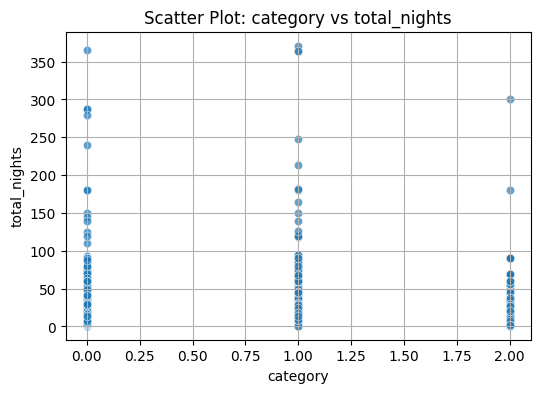

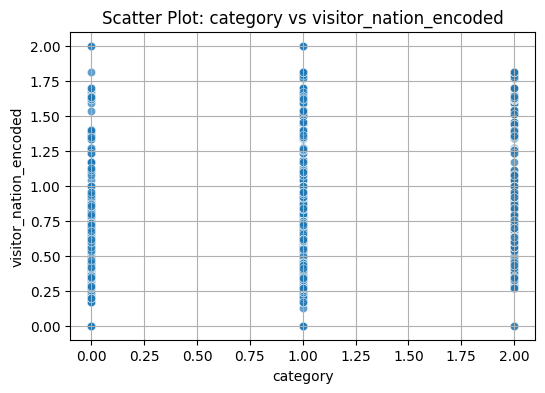

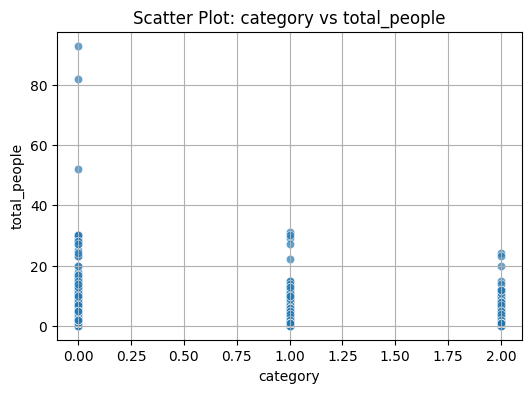

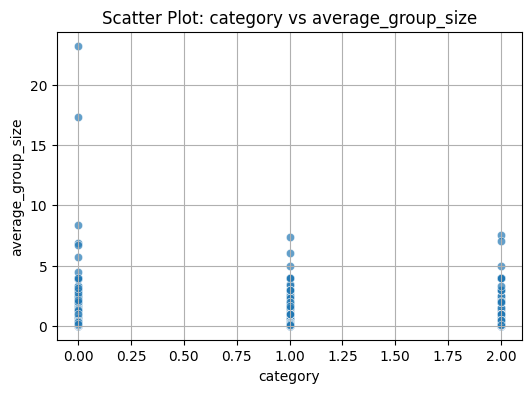

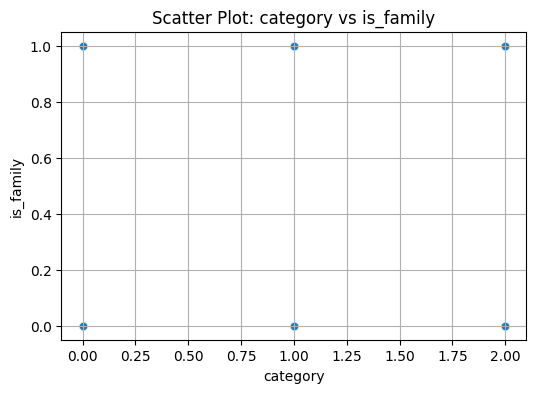

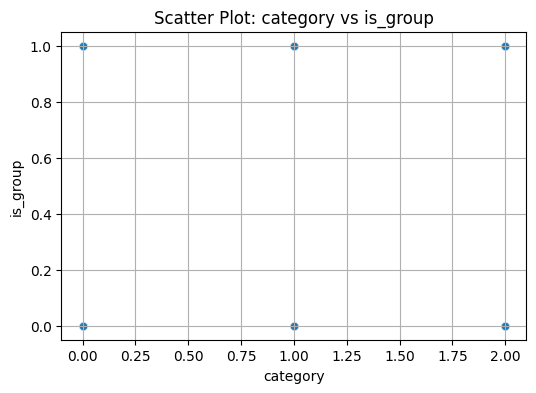

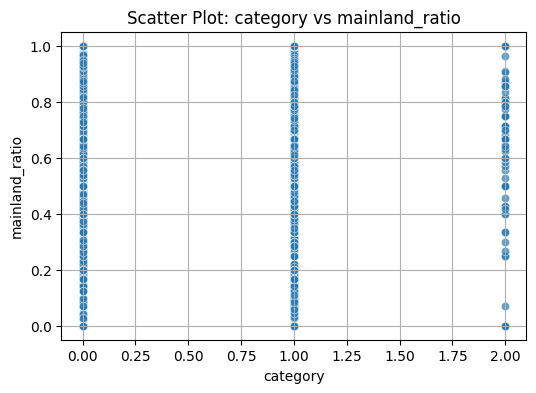

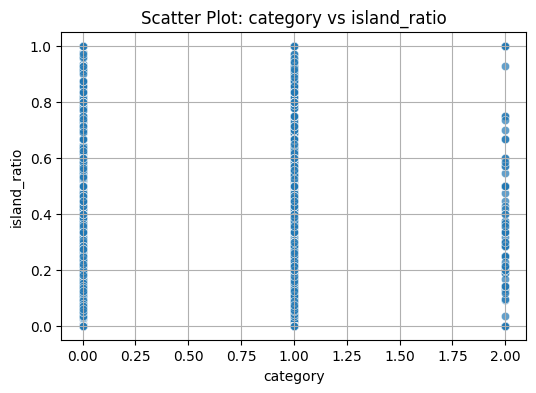

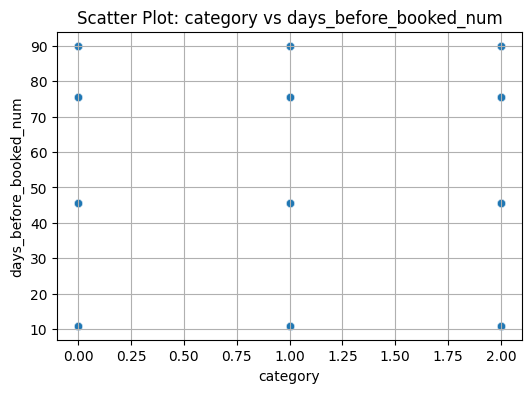

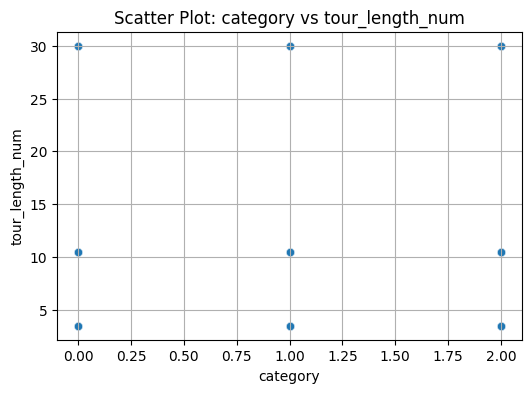

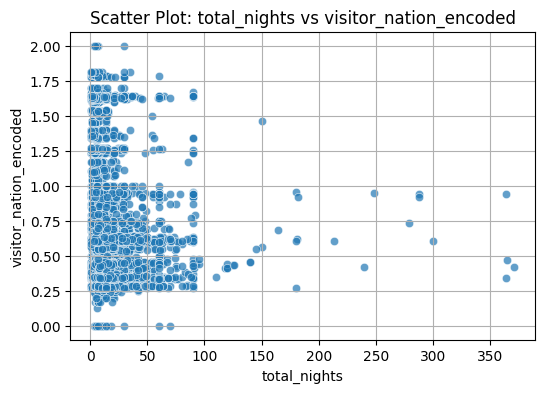

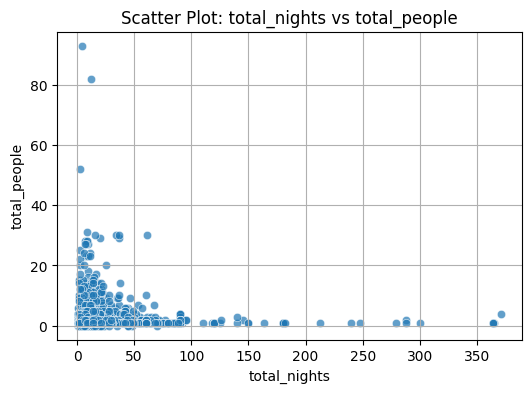

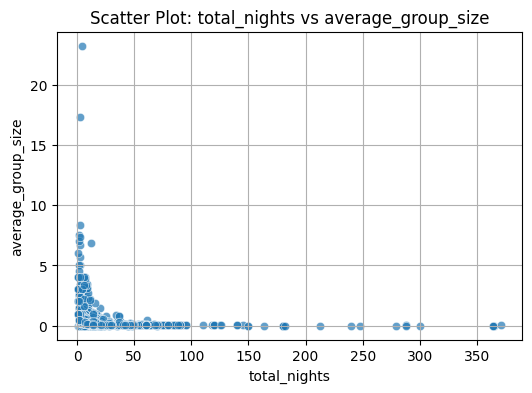

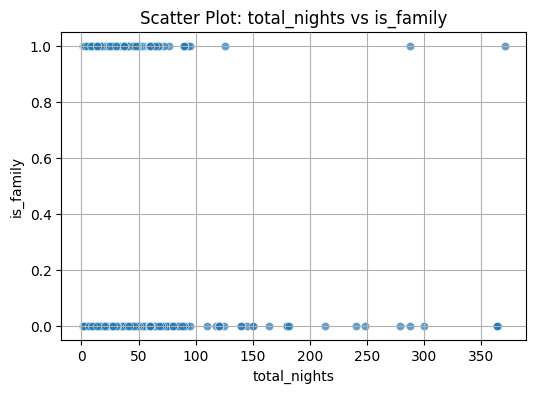

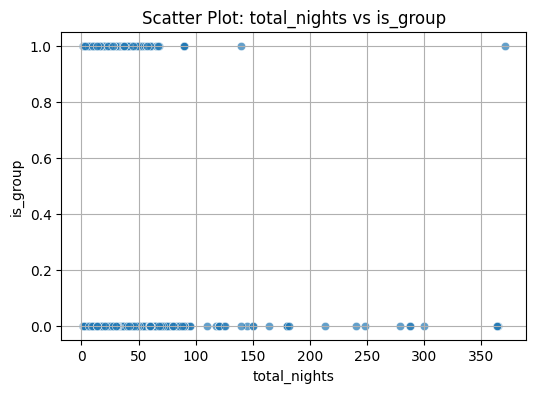

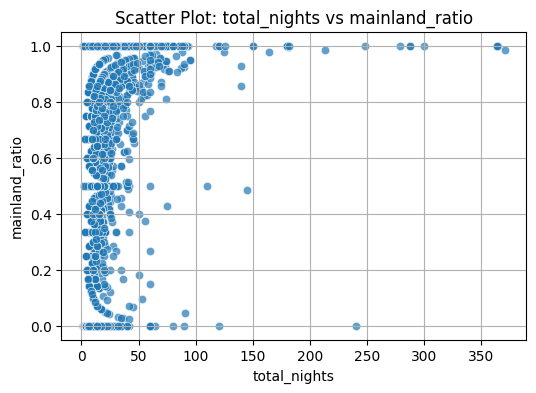

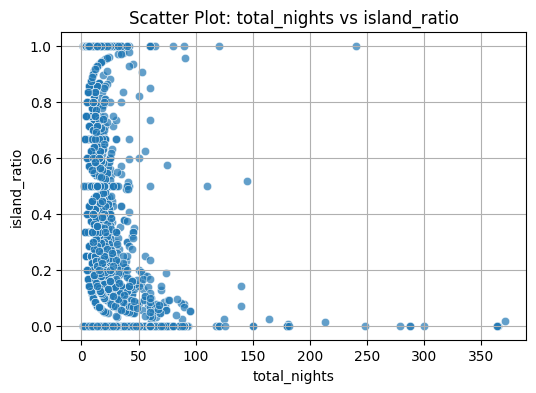

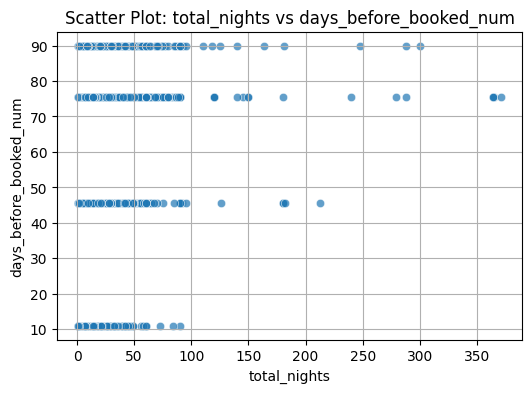

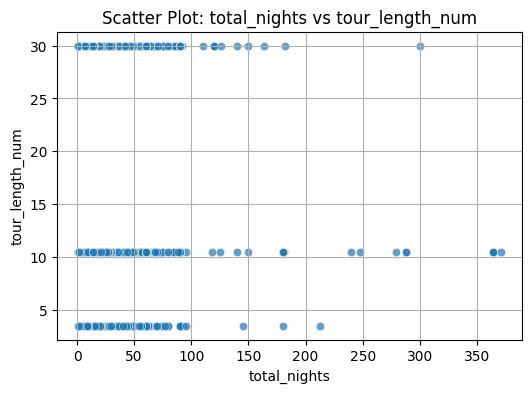

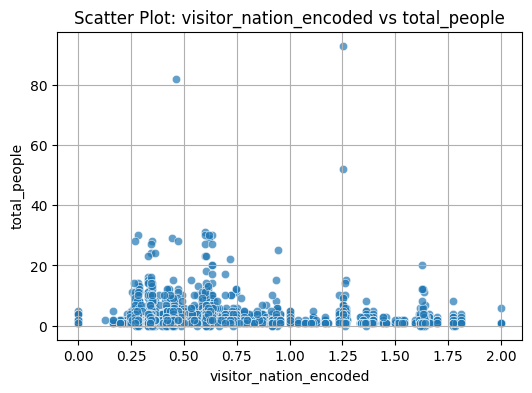

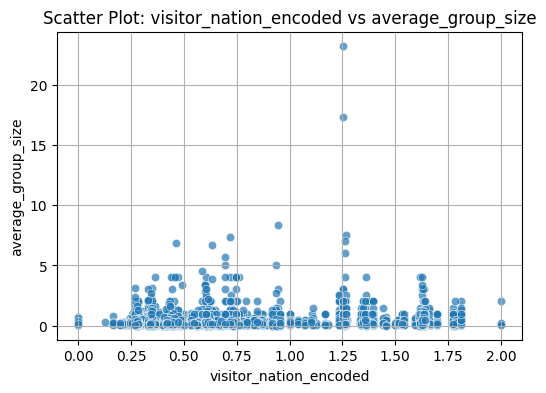

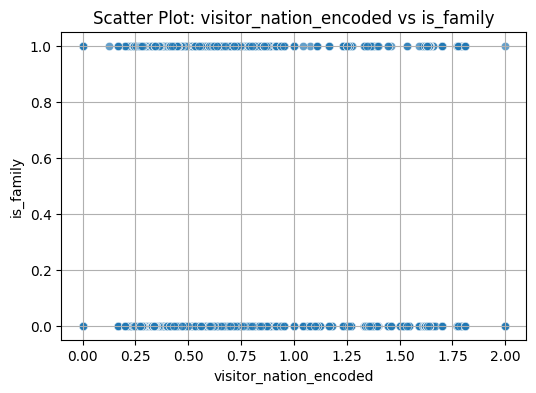

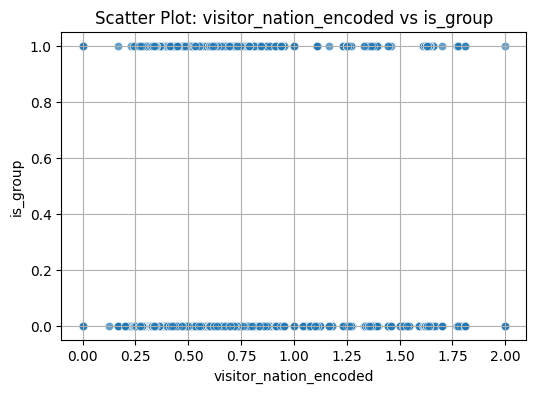

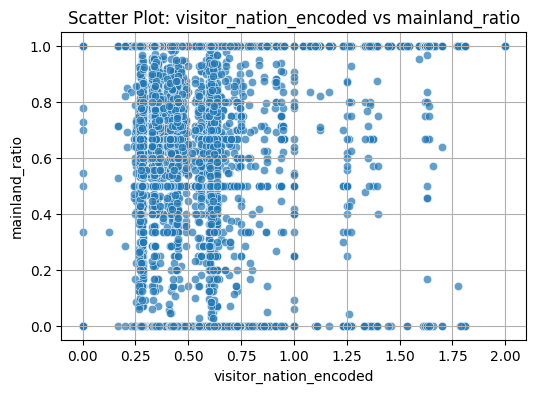

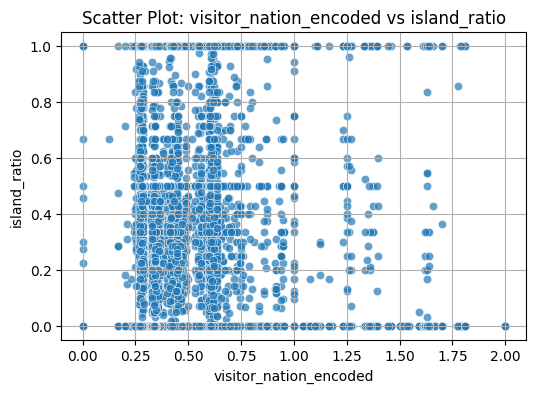

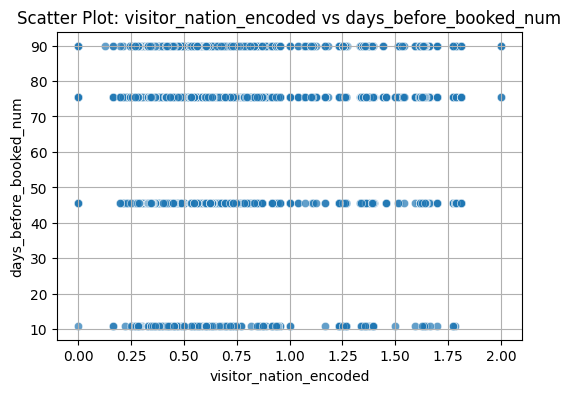

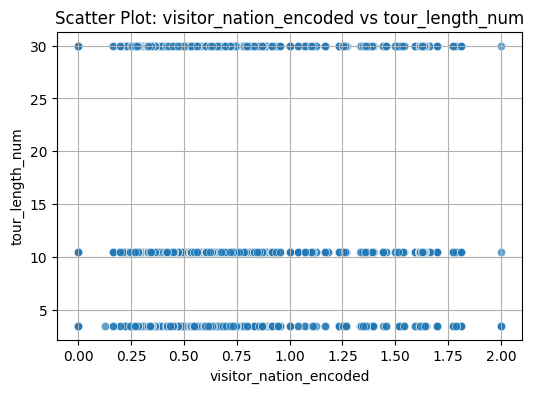

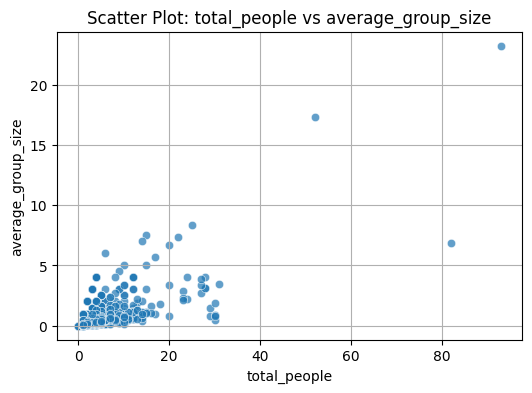

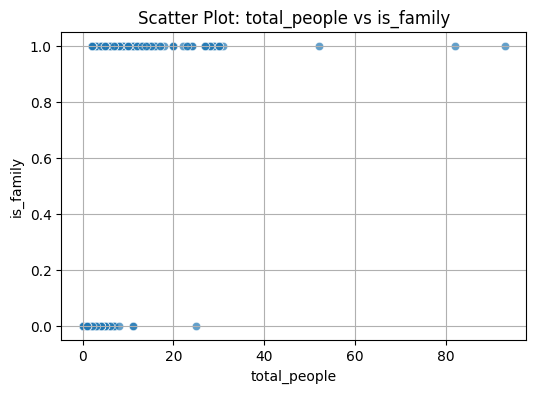

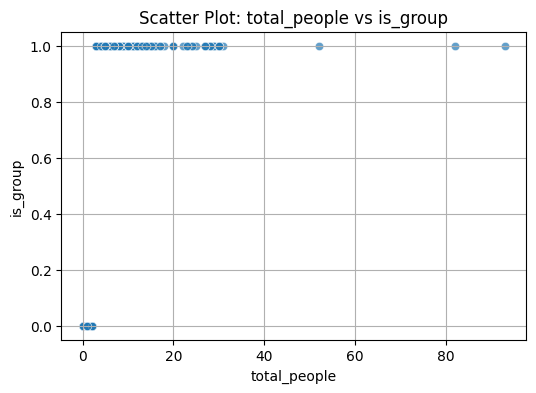

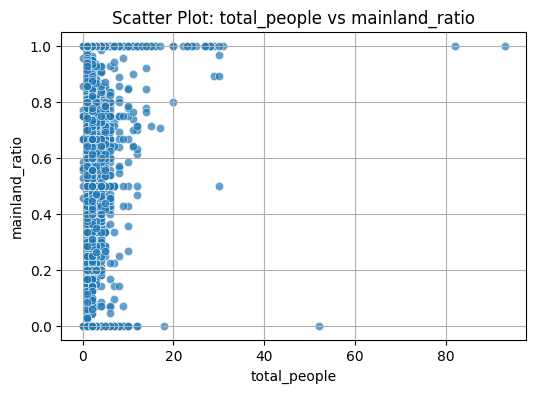

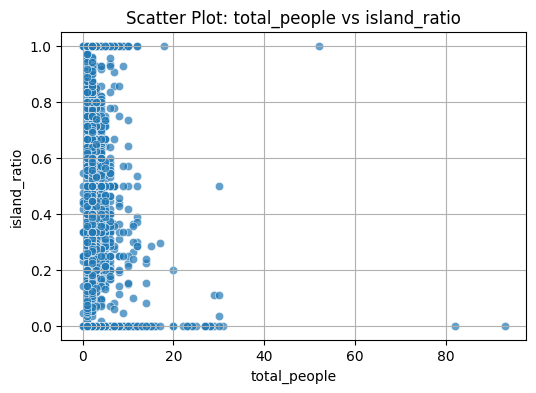

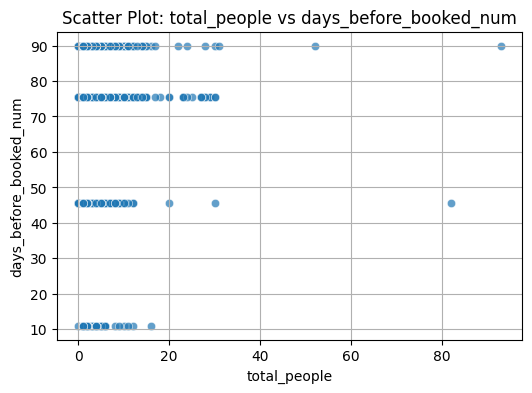

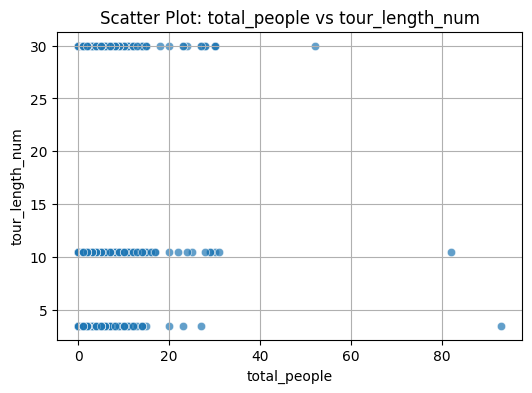

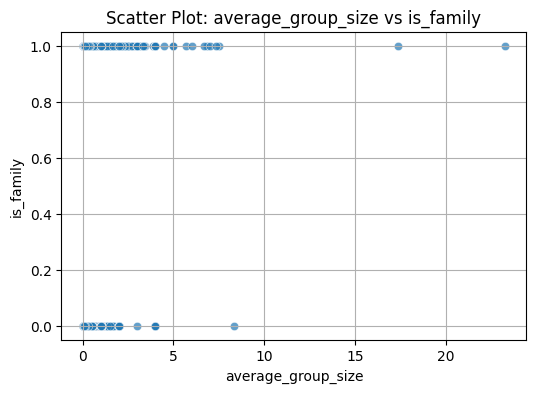

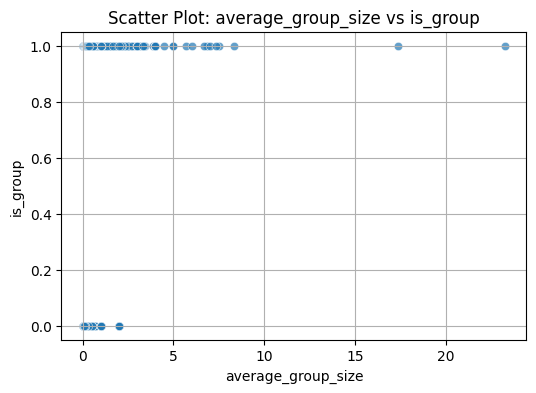

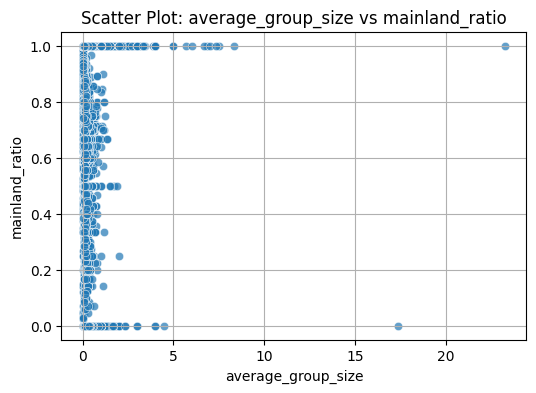

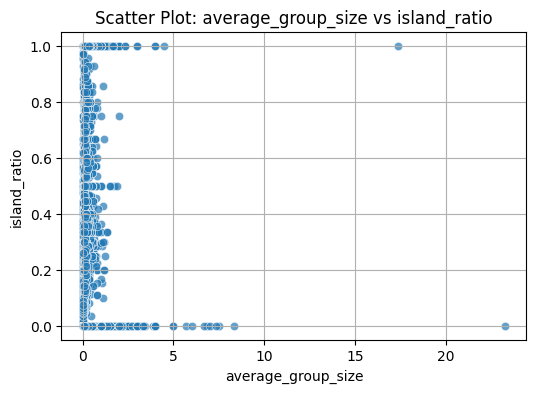

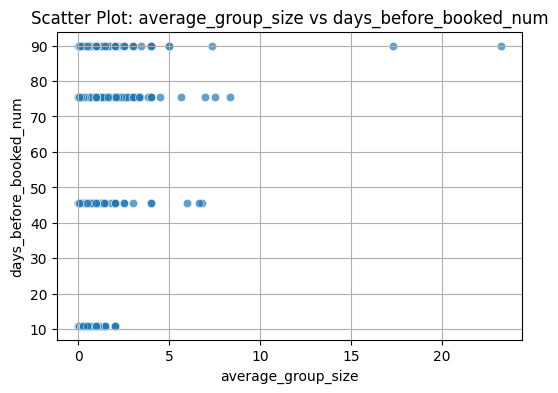

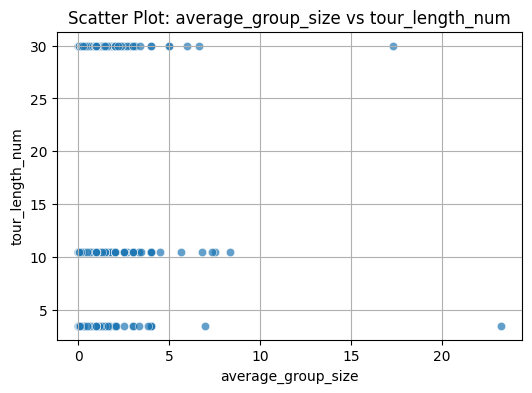

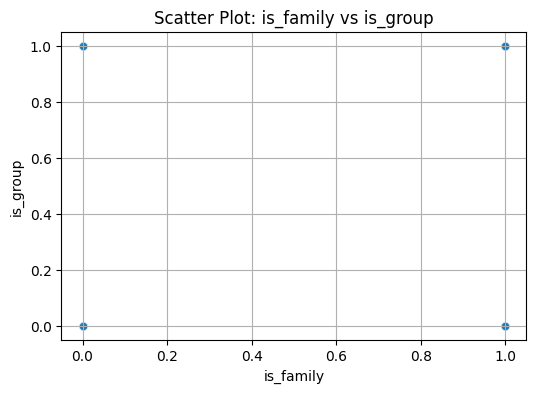

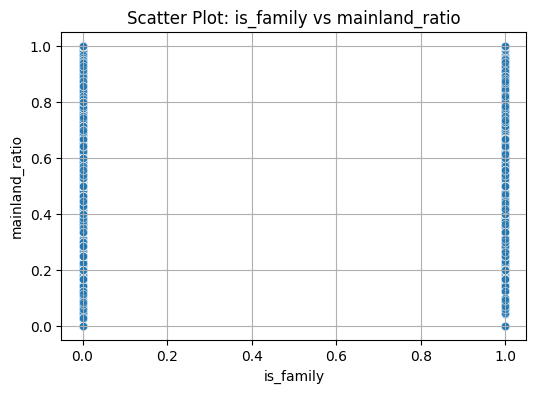

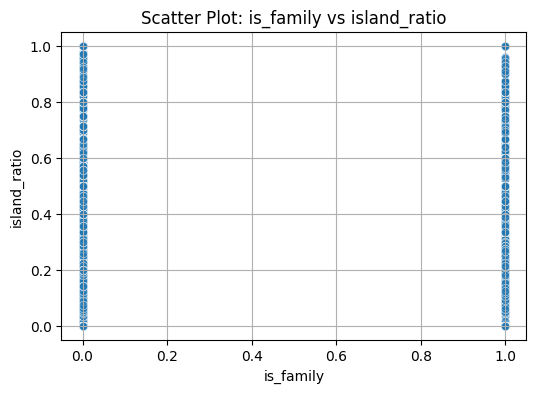

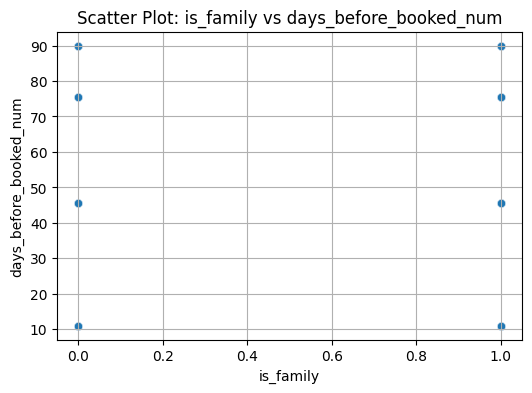

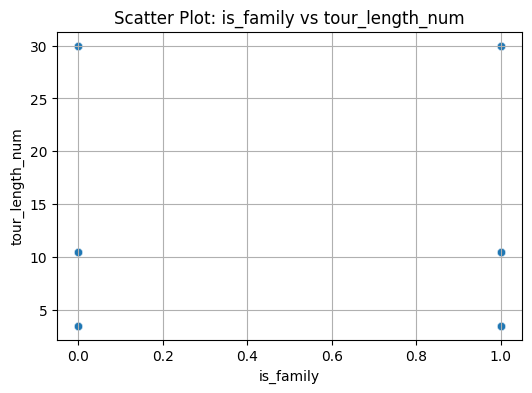

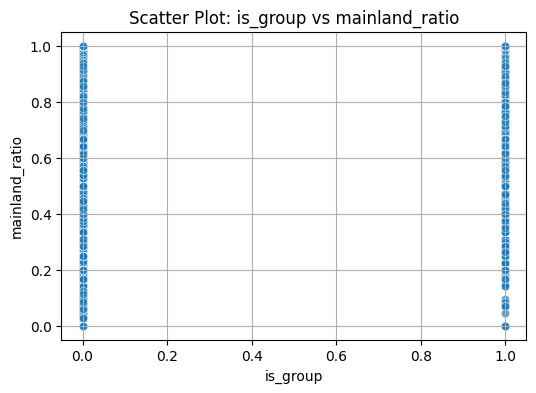

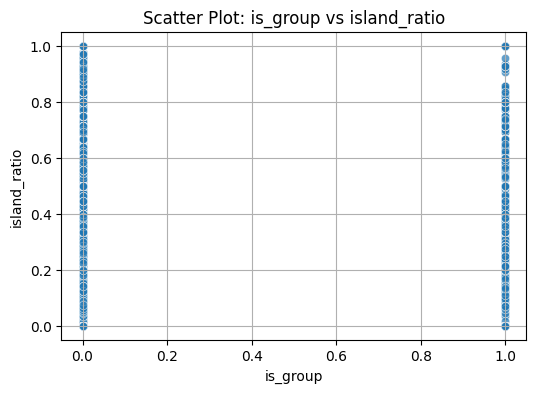

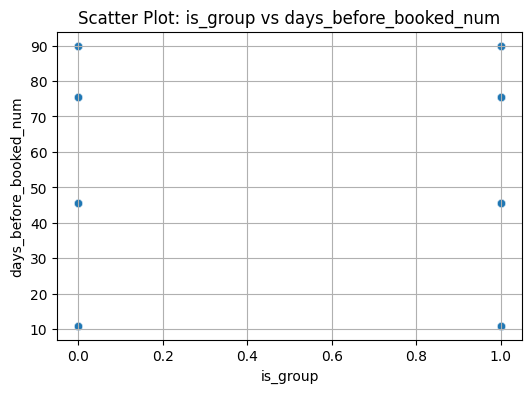

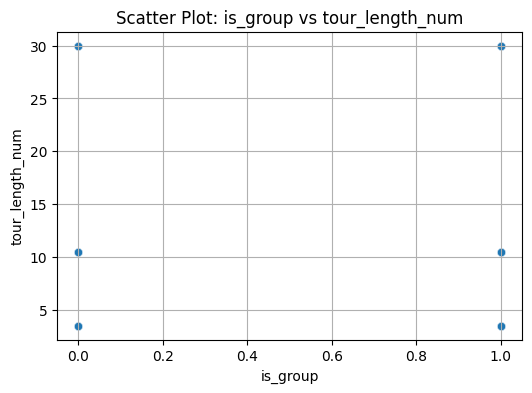

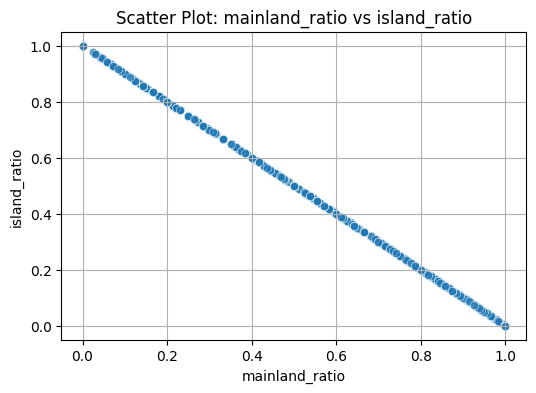

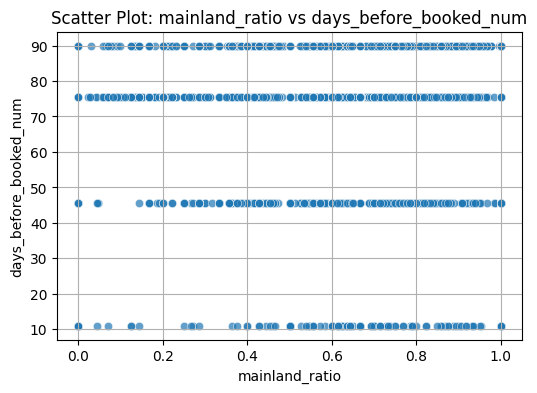

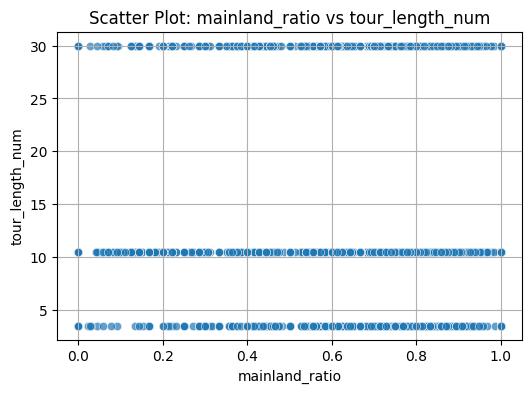

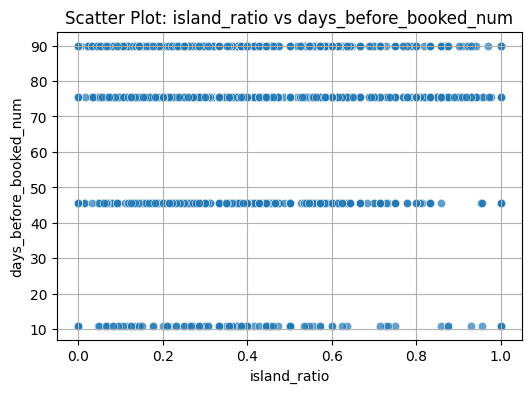

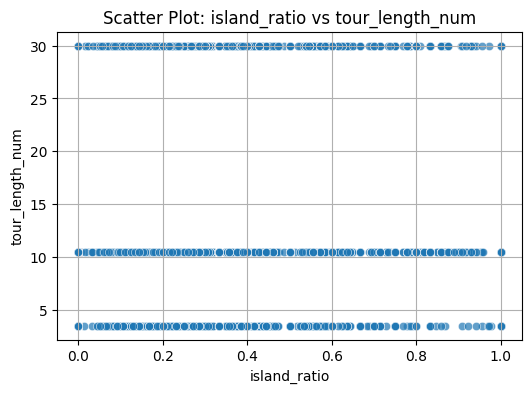

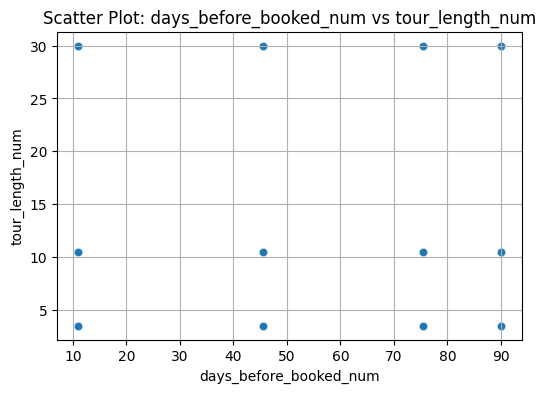

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Assuming your DataFrame is named df
# Select only numerical columns
numerical_columns = train_df.select_dtypes(include=['number']).columns

# Create pairwise scatter plots
plt.figure(figsize=(10, 8))
for col1, col2 in itertools.combinations(numerical_columns, 2):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=train_df, x=col1, y=col2, alpha=0.7)
    plt.title(f'Scatter Plot: {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.grid(True)
    plt.show()


In [182]:
test_df.isna().sum()

age_bracket                        0
key_activity                       0
transport_package_international    0
package_accomodation               0
food_package                       0
transport_package_mx               0
sightseeing_package                0
guided_tour_package                0
insurance_package                  0
total_nights                       0
visitor_nation_encoded             0
total_people                       2
average_group_size                 2
trip_duration_category             0
is_family                          0
is_group                           0
mainland_ratio                     0
island_ratio                       0
days_before_booked_num             0
tour_length_num                    0
dtype: int64

In [183]:
train_df['total_people'].fillna(train_df['total_people'].median(), inplace=True)
test_df['total_people'].fillna(train_df['total_people'].median(), inplace=True)

train_df['average_group_size'].fillna(train_df['average_group_size'].median(), inplace=True)
test_df['average_group_size'].fillna(train_df['average_group_size'].median(), inplace=True)

C:\Users\SIDDESHWAR\AppData\Local\Temp\ipykernel_26400\2292324623.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['total_people'].fillna(train_df['total_people'].median(), inplace=True)
C:\Users\SIDDESHWAR\AppData\Local\Temp\ipykernel_26400\2292324623.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

In [184]:
test_df.isna().sum()

age_bracket                        0
key_activity                       0
transport_package_international    0
package_accomodation               0
food_package                       0
transport_package_mx               0
sightseeing_package                0
guided_tour_package                0
insurance_package                  0
total_nights                       0
visitor_nation_encoded             0
total_people                       0
average_group_size                 0
trip_duration_category             0
is_family                          0
is_group                           0
mainland_ratio                     0
island_ratio                       0
days_before_booked_num             0
tour_length_num                    0
dtype: int64

In [185]:
train_df.isna().sum()

age_bracket                        8
key_activity                       0
transport_package_international    0
package_accomodation               0
food_package                       0
transport_package_mx               0
sightseeing_package                0
guided_tour_package                0
insurance_package                  0
category                           0
total_nights                       0
visitor_nation_encoded             0
total_people                       0
average_group_size                 0
trip_duration_category             0
is_family                          0
is_group                           0
mainland_ratio                     0
island_ratio                       0
days_before_booked_num             0
tour_length_num                    0
dtype: int64

In [186]:
train_df.head()

,age_bracket,key_activity,transport_package_international,package_accomodation,food_package,transport_package_mx,sightseeing_package,guided_tour_package,insurance_package,category,...,visitor_nation_encoded,total_people,average_group_size,trip_duration_category,is_family,is_group,mainland_ratio,island_ratio,days_before_booked_num,tour_length_num
0,45-64,Beach Tourism,No,No,No,No,No,No,No,1.0,...,0.270869,3.0,0.428571,medium,1,1,0.000000,1.000000,75.5,30.0
1,45-64,Conference Tourism,No,No,No,No,No,No,No,2.0,...,1.253133,1.0,0.166667,medium,0,0,1.000000,0.000000,75.5,30.0
2,25-44,Cultural Tourism,No,No,No,No,No,No,No,2.0,...,0.696833,2.0,0.333333,medium,0,0,0.666667,0.333333,90.0,30.0
3,25-44,Wildlife Tourism,No,Yes,Yes,Yes,Yes,Yes,No,0.0,...,0.282976,2.0,0.285714,medium,1,0,0.000000,1.000000,11.0,10.5
4,25-44,Beach Tourism,Yes,Yes,Yes,No,No,No,No,0.0,...,0.284483,2.0,0.285714,medium,1,0,0.000000,1.000000,90.0,10.5


# Model Evaluation
Evaluating the model's performance using metrics such as accuracy, precision, recall, and F1 score. Visualizations like confusion matrices or ROC curves might also be included.

<Axes: xlabel='age_bracket', ylabel='count'>

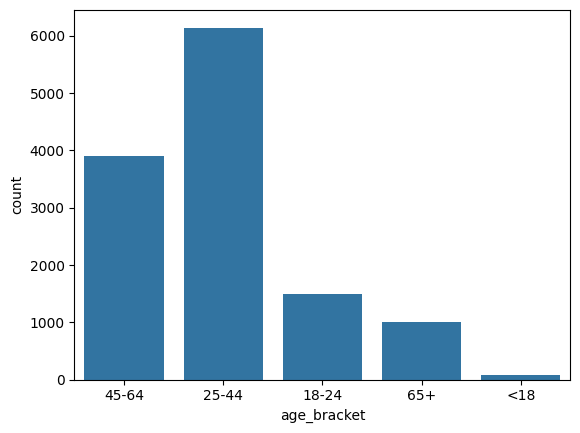

In [187]:
import seaborn as sns
sns.countplot(data=train_df, x='age_bracket')

In [188]:
train_df['age_bracket'].value_counts()

age_bracket
25-44    6146
45-64    3907
18-24    1500
65+      1011
<18        82
Name: count, dtype: int64

In [189]:
train_df.dropna(inplace=True)

In [190]:
train_df.isna().sum()

age_bracket                        0
key_activity                       0
transport_package_international    0
package_accomodation               0
food_package                       0
transport_package_mx               0
sightseeing_package                0
guided_tour_package                0
insurance_package                  0
category                           0
total_nights                       0
visitor_nation_encoded             0
total_people                       0
average_group_size                 0
trip_duration_category             0
is_family                          0
is_group                           0
mainland_ratio                     0
island_ratio                       0
days_before_booked_num             0
tour_length_num                    0
dtype: int64

In [191]:
from sklearn.preprocessing import LabelEncoder

train_df['age_bracket'] = train_df['age_bracket'].replace({'<18': 'Below 25', '18-24': 'Below 25'})
test_df['age_bracket'] = test_df['age_bracket'].replace({'<18': 'Below 25', '18-24': 'Below 25'})

label_encoder = LabelEncoder()
train_df['age_bracket_encoded'] = label_encoder.fit_transform(train_df['age_bracket'])
test_df['age_bracket_encoded'] = label_encoder.transform(test_df['age_bracket'])

In [192]:
train_df = train_df.drop(columns=['age_bracket'])
test_df = test_df.drop(columns=['age_bracket'])

In [193]:
train_df.head()

,key_activity,transport_package_international,package_accomodation,food_package,transport_package_mx,sightseeing_package,guided_tour_package,insurance_package,category,total_nights,...,total_people,average_group_size,trip_duration_category,is_family,is_group,mainland_ratio,island_ratio,days_before_booked_num,tour_length_num,age_bracket_encoded
0,Beach Tourism,No,No,No,No,No,No,No,1.0,7,...,3.0,0.428571,medium,1,1,0.000000,1.000000,75.5,30.0,1
1,Conference Tourism,No,No,No,No,No,No,No,2.0,6,...,1.0,0.166667,medium,0,0,1.000000,0.000000,75.5,30.0,1
2,Cultural Tourism,No,No,No,No,No,No,No,2.0,6,...,2.0,0.333333,medium,0,0,0.666667,0.333333,90.0,30.0,0
3,Wildlife Tourism,No,Yes,Yes,Yes,Yes,Yes,No,0.0,7,...,2.0,0.285714,medium,1,0,0.000000,1.000000,11.0,10.5,0
4,Beach Tourism,Yes,Yes,Yes,No,No,No,No,0.0,7,...,2.0,0.285714,medium,1,0,0.000000,1.000000,90.0,10.5,0


In [194]:
train_df_encoded = pd.get_dummies(train_df, drop_first=True,dtype='int64')

In [195]:
test_df_encoded = pd.get_dummies(test_df, drop_first=True,dtype='int64')

In [196]:
train_df_encoded.head()

,category,total_nights,visitor_nation_encoded,total_people,average_group_size,is_family,is_group,mainland_ratio,island_ratio,days_before_booked_num,...,key_activity_Wildlife Tourism,transport_package_international_Yes,package_accomodation_Yes,food_package_Yes,transport_package_mx_Yes,sightseeing_package_Yes,guided_tour_package_Yes,insurance_package_Yes,trip_duration_category_medium,trip_duration_category_long
0,1.0,7,0.270869,3.0,0.428571,1,1,0.000000,1.000000,75.5,...,0,0,0,0,0,0,0,0,1,0
1,2.0,6,1.253133,1.0,0.166667,0,0,1.000000,0.000000,75.5,...,0,0,0,0,0,0,0,0,1,0
2,2.0,6,0.696833,2.0,0.333333,0,0,0.666667,0.333333,90.0,...,0,0,0,0,0,0,0,0,1,0
3,0.0,7,0.282976,2.0,0.285714,1,0,0.000000,1.000000,11.0,...,1,0,1,1,1,1,1,0,1,0
4,0.0,7,0.284483,2.0,0.285714,1,0,0.000000,1.000000,90.0,...,0,1,1,1,0,0,0,0,1,0


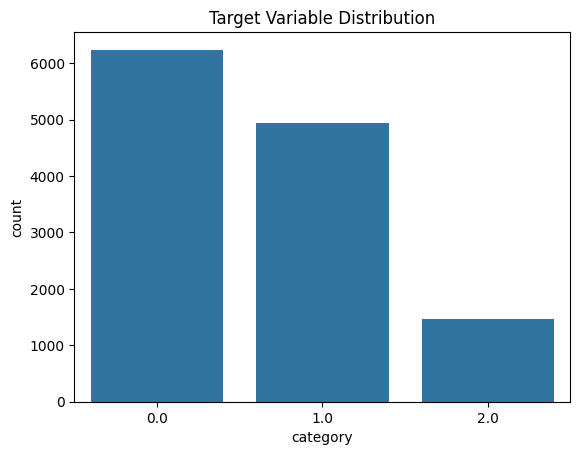

In [197]:
# Plot the distribution of the target variable (assuming 'category' is the target column)
sns.countplot(x='category', data=train_df)
plt.title("Target Variable Distribution")
plt.show()

In [198]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Define the target column
# Replace 'target_column' with the actual name of the column in your DataFrame
X = train_df_encoded.drop(columns=['category'])  # Features
y = train_df_encoded['category']  # Target

# Split the data first to avoid data leakage before scaling
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [199]:
y_train

11825    0.0
860      0.0
2935     0.0
11441    0.0
3593     1.0
        ... 
5332     1.0
4792     1.0
12552    1.0
1245     1.0
8930     0.0
Name: category, Length: 10116, dtype: float64

In [200]:
y_train.shape

(10116,)

In [201]:
X_train

array([[-0.52662727, -0.6983566 ,  1.42377346, ..., -0.414303  ,
         1.50580273, -1.09876649],
       [-0.32399666, -0.85760056,  0.02325884, ..., -0.414303  ,
         1.50580273, -1.09876649],
       [ 0.08126457, -0.70406162,  0.02325884, ...,  2.41369239,
        -0.66409761,  0.91011148],
       ...,
       [-0.59417081, -0.01636181, -0.44357936, ..., -0.414303  ,
        -0.66409761, -1.09876649],
       [-0.66171435, -0.74391475, -0.44357936, ..., -0.414303  ,
        -0.66409761, -1.09876649],
       [-0.32399666, -0.85760056,  0.02325884, ...,  2.41369239,
         1.50580273, -1.09876649]])

In [202]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the validation set
y_pred = rf_classifier.predict(X_val)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy Score:", accuracy)


Accuracy Score: 0.7339920948616601


In [203]:
temp_test_df = pd.read_csv('test.csv')

In [204]:
test_df_encoded

,total_nights,visitor_nation_encoded,total_people,average_group_size,is_family,is_group,mainland_ratio,island_ratio,days_before_booked_num,tour_length_num,...,key_activity_Wildlife Tourism,transport_package_international_Yes,package_accomodation_Yes,food_package_Yes,transport_package_mx_Yes,sightseeing_package_Yes,guided_tour_package_Yes,insurance_package_Yes,trip_duration_category_medium,trip_duration_category_long
0,14,1.500000,1.0,0.071429,0,0,1.000000,0.000000,75.5,10.5,...,1,0,0,0,0,0,0,0,0,1
1,13,0.436170,2.0,0.153846,1,0,0.615385,0.384615,75.5,3.5,...,1,1,1,1,0,0,1,0,0,1
2,9,0.500000,2.0,0.222222,0,0,0.333333,0.666667,75.5,30.0,...,0,1,1,1,1,1,1,0,0,1
3,5,0.823529,2.0,0.400000,1,0,1.000000,0.000000,90.0,10.5,...,1,0,1,1,1,1,1,0,1,0
4,6,0.428986,2.0,0.333333,0,0,0.000000,1.000000,75.5,30.0,...,1,0,1,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5847,3,1.373596,1.0,0.333333,0,0,1.000000,0.000000,75.5,3.5,...,0,0,0,0,0,0,0,0,0,0
5848,9,0.340502,2.0,0.222222,1,0,1.000000,0.000000,45.5,30.0,...,1,1,1,1,1,1,1,0,0,1
5849,8,0.561404,3.0,0.375000,1,1,0.000000,1.000000,75.5,30.0,...,0,0,0,0,0,0,0,0,0,1
5850,2,0.684211,1.0,0.500000,0,0,1.000000,0.000000,75.5,10.5,...,0,0,0,0,0,0,0,0,0,0


In [205]:
test_df_encoded_scaled = scaler.transform(test_df_encoded)
test_df_encoded_scaled = pd.DataFrame(test_df_encoded_scaled, columns=test_df_encoded.columns)

In [206]:
test_df_encoded_scaled

,total_nights,visitor_nation_encoded,total_people,average_group_size,is_family,is_group,mainland_ratio,island_ratio,days_before_booked_num,tour_length_num,...,key_activity_Wildlife Tourism,transport_package_international_Yes,package_accomodation_Yes,food_package_Yes,transport_package_mx_Yes,sightseeing_package_Yes,guided_tour_package_Yes,insurance_package_Yes,trip_duration_category_medium,trip_duration_category_long
0,0.148808,2.230653,-0.443579,-0.521372,-0.905763,-0.426352,0.646328,-0.646328,0.102918,-0.469535,...,1.088522,-0.723370,-0.985865,-0.924914,-0.869977,-0.685352,-0.720677,-0.414303,-0.664098,0.910111
1,0.081265,-0.472210,0.023259,-0.330912,1.104042,-0.426352,-0.448941,0.448941,0.102918,-1.137629,...,1.088522,1.382418,1.014338,1.081182,-0.869977,-0.685352,1.387584,-0.414303,-0.664098,0.910111
2,-0.188910,-0.310038,0.023259,-0.172900,-0.905763,-0.426352,-1.252138,1.252138,0.102918,1.391584,...,-0.918676,1.382418,1.014338,1.081182,1.149456,1.459103,1.387584,-0.414303,-0.664098,0.910111
3,-0.459084,0.511951,0.023259,0.237931,1.104042,-0.426352,0.646328,-0.646328,0.922855,-0.469535,...,1.088522,-0.723370,1.014338,1.081182,1.149456,1.459103,1.387584,-0.414303,1.505803,-1.098766
4,-0.391540,-0.490464,0.023259,0.083869,-0.905763,-0.426352,-2.201371,2.201371,0.102918,1.391584,...,1.088522,-0.723370,1.014338,1.081182,-0.869977,1.459103,-0.720677,2.413692,1.505803,-1.098766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5847,-0.594171,1.909499,-0.443579,0.083869,-0.905763,-0.426352,0.646328,-0.646328,0.102918,-1.137629,...,-0.918676,-0.723370,-0.985865,-0.924914,-0.869977,-0.685352,-0.720677,-0.414303,-0.664098,-1.098766
5848,-0.188910,-0.715273,0.023259,-0.172900,1.104042,-0.426352,0.646328,-0.646328,-1.593502,1.391584,...,1.088522,1.382418,1.014338,1.081182,1.149456,1.459103,1.387584,-0.414303,-0.664098,0.910111
5849,-0.256453,-0.154030,0.490097,0.180158,1.104042,2.345482,-2.201371,2.201371,0.102918,1.391584,...,-0.918676,-0.723370,-0.985865,-0.924914,-0.869977,-0.685352,-0.720677,-0.414303,-0.664098,0.910111
5850,-0.661714,0.157984,-0.443579,0.469023,-0.905763,-0.426352,0.646328,-0.646328,0.102918,-0.469535,...,-0.918676,-0.723370,-0.985865,-0.924914,-0.869977,-0.685352,-0.720677,-0.414303,-0.664098,-1.098766


<Axes: >

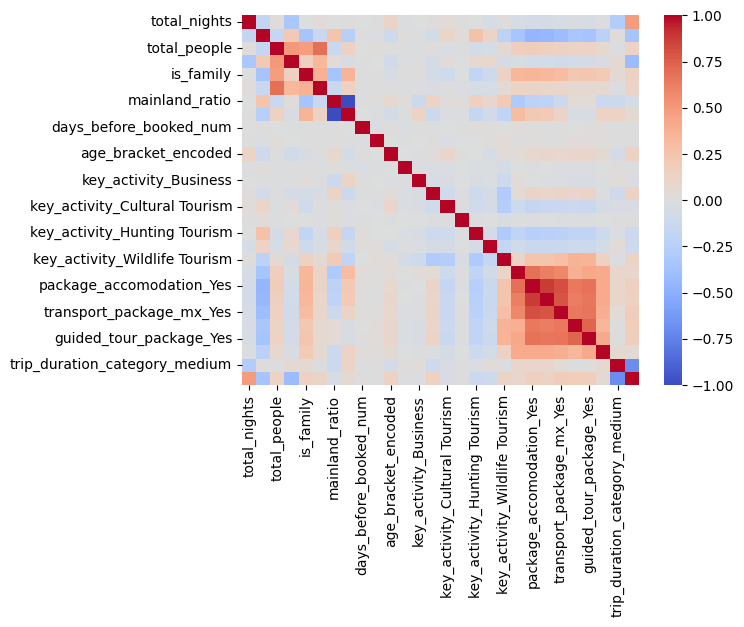

In [207]:
sns.heatmap(test_df_encoded_scaled.corr(), annot=False, cmap='coolwarm')

# Insights and Improvements
Insights from the analysis and potential ways to improve the model. These could include collecting more data, engineering better features, or using advanced algorithms.

In [208]:
X_train

array([[-0.52662727, -0.6983566 ,  1.42377346, ..., -0.414303  ,
         1.50580273, -1.09876649],
       [-0.32399666, -0.85760056,  0.02325884, ..., -0.414303  ,
         1.50580273, -1.09876649],
       [ 0.08126457, -0.70406162,  0.02325884, ...,  2.41369239,
        -0.66409761,  0.91011148],
       ...,
       [-0.59417081, -0.01636181, -0.44357936, ..., -0.414303  ,
        -0.66409761, -1.09876649],
       [-0.66171435, -0.74391475, -0.44357936, ..., -0.414303  ,
        -0.66409761, -1.09876649],
       [-0.32399666, -0.85760056,  0.02325884, ...,  2.41369239,
         1.50580273, -1.09876649]])

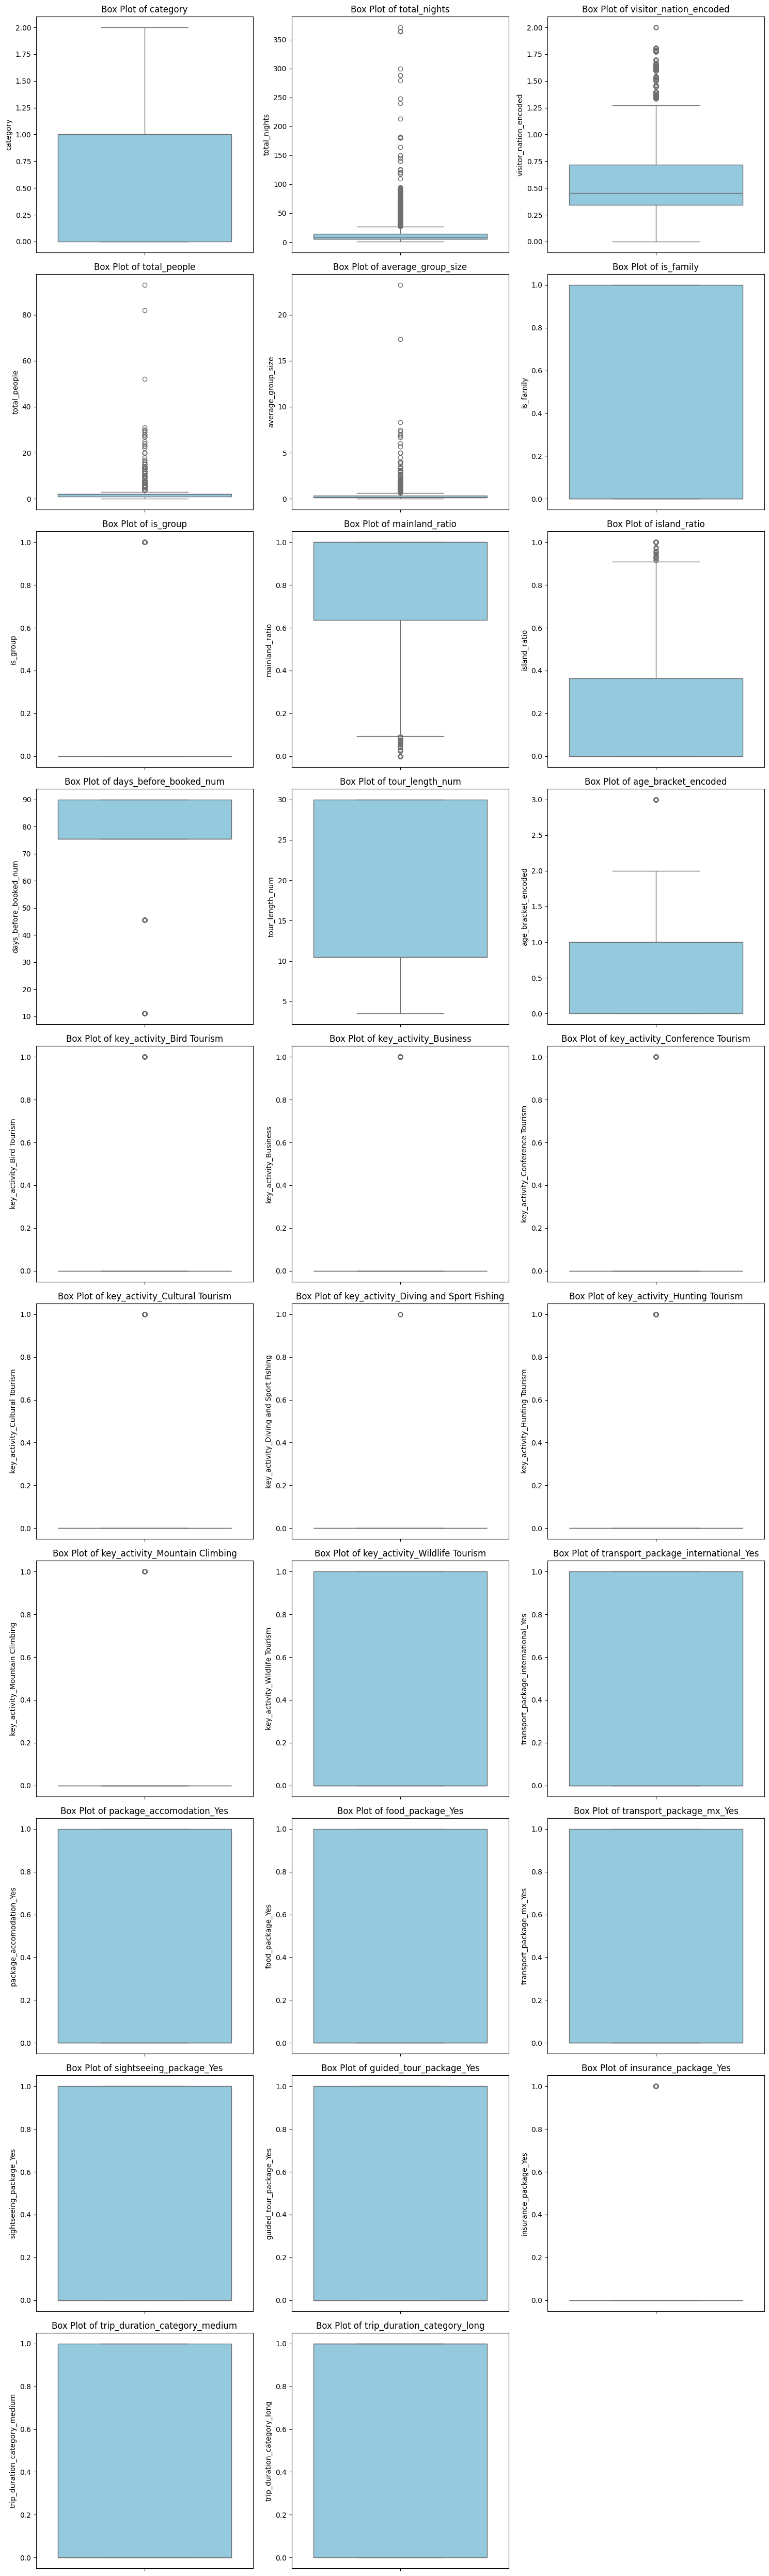

In [209]:
import math

columns = train_df_encoded.select_dtypes(include=['number']).columns  # Select only numerical columns
n_cols = 3  # Number of plots per row
n_rows = math.ceil(len(columns) / n_cols)  # Calculate the number of rows needed

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten to make indexing easier

for i, col in enumerate(columns):
    sns.boxplot(data=train_df_encoded, y=col, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

# Remove unused subplots
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [210]:
# import pandas as pd

# # Assuming temp_test_df contains the 'trip_id' column and is aligned with test_df_encoded
# # Make predictions
# predictions = rf_classifier.predict(test_df_encoded_scaled)

# # Create a new DataFrame with trip_id and predictions
# results_df = pd.DataFrame({
#     'trip_ID': temp_test_df['trip_ID'],  # Ensure temp_test_df has the same length as predictions
#     'category': predictions
# })

# # Save to a new CSV file
# results_df.to_csv('predictions_results_rf.csv', index=False)

# print("Predictions saved to predictions_results.csv")

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Define the target column
X = train_df_encoded.drop(columns=['category'])  # Features
y = train_df_encoded['category']  # Target

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize and apply the scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Convert back to DataFrames to retain column names
X_train = pd.DataFrame(X_train, columns=X.columns)
X_val = pd.DataFrame(X_val, columns=X.columns)

# Train the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict and calculate accuracy on the validation set
y_pred = rf_classifier.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy Score:", accuracy)

# Load the test data
temp_test_df = pd.read_csv('test.csv')

# Scale the test data with the same scaler used on the training data
test_df_encoded_scaled = scaler.transform(test_df_encoded)
test_df_encoded_scaled = pd.DataFrame(test_df_encoded_scaled, columns=test_df_encoded.columns)

# Make predictions on the test set
predictions = rf_classifier.predict(test_df_encoded_scaled)

# Create a DataFrame with trip_ID and predictions
results_df = pd.DataFrame({
    'trip_ID': temp_test_df['trip_ID'],
    'category': predictions
})

# Save predictions to a new CSV file
results_df.to_csv('predictions_results_rf.csv', index=False)
print("Predictions saved to predictions_results_rf.csv")


Accuracy Score: 0.7339920948616601
Predictions saved to predictions_results_rf.csv


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the base classifier
base_estimator = DecisionTreeClassifier(max_depth=1)

# Create the AdaBoost model
ada_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

# Train the AdaBoost model on the filtered data
ada_model.fit(X_train, y_train)

predictions = ada_model.predict(test_df_encoded_scaled)

results_df = pd.DataFrame({
    'trip_ID': temp_test_df['trip_ID'],  # Ensure temp_test_df has the same length as predictions
    'category': predictions
})

# Save to a new CSV file
results_df.to_csv('predictions_results_adaboost.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
print(results_df.head())

           trip_ID  category
0  tour_id8gzpck76       1.0
1  tour_idow1zxkou       0.0
2  tour_idue7esfqz       0.0
3  tour_idnj3mjzpb       0.0
4  tour_ida3us5yk2       0.0


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Predict and calculate accuracy on the validation set
y_pred = gb_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy Score with Gradient Boosting:", accuracy)

# Make predictions on the test set
predictions = gb_model.predict(test_df_encoded_scaled)

# Create a DataFrame with trip_ID and predictions
results_df = pd.DataFrame({
    'trip_ID': temp_test_df['trip_ID'],
    'category': predictions
})

# Save predictions to a new CSV file
results_df.to_csv('predictions_results_gradient_boosting.csv', index=False)
print("Predictions saved to predictions_results_gradient_boosting.csv")


Accuracy Score with Gradient Boosting: 0.7470355731225297
Predictions saved to predictions_results_gradient_boosting.csv


In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Initialize the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Predict and calculate accuracy on the validation set
y_pred = xgb_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy Score with XGBoost:", accuracy)

# Make predictions on the test set
predictions = xgb_model.predict(test_df_encoded_scaled)

# Create a DataFrame with trip_ID and predictions
results_df = pd.DataFrame({
    'trip_ID': temp_test_df['trip_ID'],
    'category': predictions
})

# Save predictions to a new CSV file
results_df.to_csv('predictions_results_xgboost.csv', index=False)
print("Predictions saved to predictions_results_xgboost.csv")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:49:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy Score with XGBoost: 0.7478260869565218
Predictions saved to predictions_results_xgboost.csv


In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV

# Function to clean column names
def clean_column_names(df):
    df.columns = df.columns.str.replace(r'[\[\]<>,]', '', regex=True)
    return df

# Clean column names
# X_train = clean_column_names(X_train)
# X_val = clean_column_names(X_val)
# X_test = clean_column_names(X_test)

# Train initial XGBoost model with early stopping
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.05, early_stopping_rounds=10, eval_metric="mae", random_state=0, n_jobs=-1)
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=0)

# Define a parameter grid for quick tuning of XGBoost
param_grid = {
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 4],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'gamma': [0, 0.1]
}

# Randomized search on XGBoost parameters
random_search = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=0),
    param_distributions=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    n_iter=10,
    verbose=1
)
random_search.fit(X_train, y_train)

# Get the best XGBoost parameters and re-train the final model
best_xgb_params = random_search.best_params_
print("Best XGBoost Parameters:", best_xgb_params)

xgb_final = XGBRegressor(**best_xgb_params, random_state=0)
xgb_final.fit(X_train, y_train)
xgb_predictions = xgb_final.predict(X_val)

# Train RandomForest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_val)

# Ensemble: Average predictions from both models
ensemble_predictions = (xgb_predictions + rf_predictions) / 2
ensemble_mae = mean_absolute_error(y_val, ensemble_predictions)
print("Ensemble Model Mean Absolute Error:", ensemble_mae)

# Predict on test set using the ensemble model
xgb_test_predictions = xgb_final.predict(test_df_encoded_scaled)
rf_test_predictions = rf_model.predict(test_df_encoded_scaled)
ensemble_test_predictions = (xgb_test_predictions + rf_test_predictions) / 2

# Load the test dataset
# Assuming temp_test_df has a 'trip_ID' column
temp_test_df = pd.read_csv('test.csv')

# 1. XGBoost Predictions on test set
xgb_output = pd.DataFrame({'trip_ID': temp_test_df['trip_ID'], 'category': xgb_test_predictions})
xgb_output['category'] = pd.cut(xgb_output['category'], bins=[-float('inf'), 0.6, 1.3, float('inf')], labels=[0, 1, 2])
xgb_output.to_csv('submission_xgb1.csv', index=False)

# 2. RandomForest Predictions on test set
rf_output = pd.DataFrame({'trip_ID': temp_test_df['trip_ID'], 'category': rf_test_predictions})
rf_output['category'] = pd.cut(rf_output['category'], bins=[-float('inf'), 0.6, 1.3, float('inf')], labels=[0, 1, 2])
rf_output.to_csv('submission_rf1.csv', index=False)

# 3. Ensemble Predictions on test set
ensemble_output = pd.DataFrame({'trip_ID': temp_test_df['trip_ID'], 'category': ensemble_test_predictions})
ensemble_output['category'] = pd.cut(ensemble_output['category'], bins=[-float('inf'), 0.6, 1.3, float('inf')], labels=[0, 1, 2])
ensemble_output.to_csv('submission_ensemble1.csv', index=False)

print("Submissions for XGBoost, RandomForest, and Ensemble models saved successfully.")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best XGBoost Parameters: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}
Ensemble Model Mean Absolute Error: 0.3389846394530176
Submissions for XGBoost, RandomForest, and Ensemble models saved successfully.


<Axes: ylabel='None'>

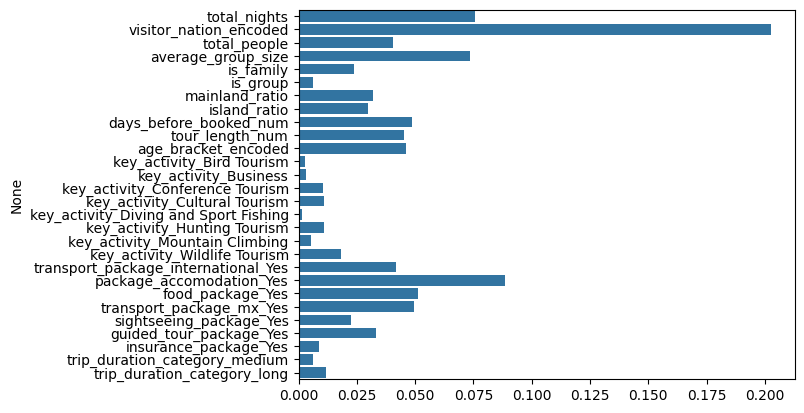

In [ ]:
#feature extraction
#x-axis represents importance of features and y-axis represent column names

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier().fit(X, y)
importances = model.feature_importances_
sns.barplot(x=importances, y=X.columns)


In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingClassifier

# Function to clean column names
def clean_column_names(df):
    df.columns = df.columns.str.replace(r'[\[\]<>,]', '', regex=True)
    return df

# Clean column names (if needed)
# X_train = clean_column_names(X_train)
# X_val = clean_column_names(X_val)
# X_test = clean_column_names(X_test)

# Train initial XGBoost model with early stopping
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.05, early_stopping_rounds=10, eval_metric="mlogloss", random_state=0, n_jobs=-1)
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=0)

# Define a parameter grid for quick tuning of XGBoost
param_grid = {
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 4],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'gamma': [0, 0.1]
}

# Randomized search on XGBoost parameters
random_search = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=0),
    param_distributions=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    n_iter=10,
    verbose=1
)
random_search.fit(X_train, y_train)

# Get the best XGBoost parameters and re-train the final model
best_xgb_params = random_search.best_params_
print("Best XGBoost Parameters:", best_xgb_params)

xgb_final = XGBClassifier(**best_xgb_params, random_state=0)
xgb_final.fit(X_train, y_train)
xgb_predictions = xgb_final.predict(X_val)

# Train RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_val)

# Ensemble using majority voting
ensemble_model = VotingClassifier(estimators=[
    ('xgb', xgb_final),
    ('rf', rf_model)
], voting='soft')

ensemble_model.fit(X_train, y_train)
ensemble_predictions = ensemble_model.predict(X_val)
ensemble_accuracy = accuracy_score(y_val, ensemble_predictions)
print("Ensemble Model Accuracy:", ensemble_accuracy)

# Predict on test set using the ensemble model
xgb_test_predictions = xgb_final.predict(test_df_encoded_scaled)
rf_test_predictions = rf_model.predict(test_df_encoded_scaled)
ensemble_test_predictions = ensemble_model.predict(test_df_encoded_scaled)

# Load the test dataset
temp_test_df = pd.read_csv('test.csv')

# Save each model's predictions and ensemble predictions to CSV files
# 1. XGBoost Predictions on test set
xgb_output = pd.DataFrame({'trip_ID': temp_test_df['trip_ID'], 'category': xgb_test_predictions})
xgb_output.to_csv('submission_xgb2.csv', index=False)

# 2. RandomForest Predictions on test set
rf_output = pd.DataFrame({'trip_ID': temp_test_df['trip_ID'], 'category': rf_test_predictions})
rf_output.to_csv('submission_rf2.csv', index=False)

# 3. Ensemble Predictions on test set
ensemble_output = pd.DataFrame({'trip_ID': temp_test_df['trip_ID'], 'category': ensemble_test_predictions})
ensemble_output.to_csv('submission_ensemble2.csv', index=False)

print("Submissions for XGBoost, RandomForest, and Ensemble models saved successfully.")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best XGBoost Parameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}
Ensemble Model Accuracy: 0.7426877470355732
Submissions for XGBoost, RandomForest, and Ensemble models saved successfully.


In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV

# Function to clean column names
def clean_column_names(df):
    df.columns = df.columns.str.replace(r'[\[\]<>,]', '', regex=True)
    return df

# Clean column names (if needed)
# X_train = clean_column_names(X_train)
# X_val = clean_column_names(X_val)
# X_test = clean_column_names(X_test)

# Train initial XGBoost model with early stopping
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.05, early_stopping_rounds=10, eval_metric="mae", random_state=0, n_jobs=-1)
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=0)

# Define a parameter grid for quick tuning of XGBoost
param_grid = {
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 4],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'gamma': [0, 0.1]
}

# Randomized search on XGBoost parameters
random_search = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=0),
    param_distributions=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    n_iter=10,
    verbose=1
)
random_search.fit(X_train, y_train)

# Get the best XGBoost parameters and re-train the final model
best_xgb_params = random_search.best_params_
print("Best XGBoost Parameters:", best_xgb_params)

xgb_final = XGBRegressor(**best_xgb_params, random_state=0)
xgb_final.fit(X_train, y_train)
xgb_predictions = xgb_final.predict(X_val)

# Train GradientBoosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_val)

# Ensemble: Average predictions from both models
ensemble_predictions = (xgb_predictions + gb_predictions) / 2
ensemble_mae = mean_absolute_error(y_val, ensemble_predictions)
print("Ensemble Model Mean Absolute Error:", ensemble_mae)

# Predict on test set using the ensemble model
xgb_test_predictions = xgb_final.predict(test_df_encoded_scaled)
gb_test_predictions = gb_model.predict(test_df_encoded_scaled)
ensemble_test_predictions = (xgb_test_predictions + gb_test_predictions) / 2

# Load the test dataset
# Assuming temp_test_df has a 'trip_ID' column
temp_test_df = pd.read_csv('test.csv')

# 1. XGBoost Predictions on test set
xgb_output = pd.DataFrame({'trip_ID': temp_test_df['trip_ID'], 'category': xgb_test_predictions})
xgb_output['category'] = pd.cut(xgb_output['category'], bins=[-float('inf'), 0.6, 1.3, float('inf')], labels=[0, 1, 2])
xgb_output.to_csv('submission_xgb3.csv', index=False)

# 2. GradientBoosting Predictions on test set
gb_output = pd.DataFrame({'trip_ID': temp_test_df['trip_ID'], 'category': gb_test_predictions})
gb_output['category'] = pd.cut(gb_output['category'], bins=[-float('inf'), 0.6, 1.3, float('inf')], labels=[0, 1, 2])
gb_output.to_csv('submission_gb3.csv', index=False)

# 3. Ensemble Predictions on test set
ensemble_output = pd.DataFrame({'trip_ID': temp_test_df['trip_ID'], 'category': ensemble_test_predictions})
ensemble_output['category'] = pd.cut(ensemble_output['category'], bins=[-float('inf'), 0.6, 1.3, float('inf')], labels=[0, 1, 2])
ensemble_output.to_csv('submission_ensemble3.csv', index=False)

print("Submissions for XGBoost, GradientBoosting, and Ensemble models saved successfully.")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best XGBoost Parameters: {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}
Ensemble Model Mean Absolute Error: 0.3388051585157507
Submissions for XGBoost, GradientBoosting, and Ensemble models saved successfully.


In [ ]:
pip install --upgrade xgboost


In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV

# Function to clean column names
def clean_column_names(df):
    df.columns = df.columns.str.replace(r'[\[\]<>,]', '', regex=True)
    return df

# Clean column names (if needed)
# X_train = clean_column_names(X_train)
# X_val = clean_column_names(X_val)
# X_test = clean_column_names(X_test)

# Define hyperparameters for the first XGBoost model
param_grid_xgb1 = {
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 150],
    'max_depth': [3, 5],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'gamma': [0, 0.1]
}

# Randomized search on parameters for the first XGBoost model
xgb1_random_search = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_distributions=param_grid_xgb1,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    n_iter=10,
    verbose=1
)
xgb1_random_search.fit(X_train, y_train)

# Get best parameters and train the first XGBoost model
best_xgb1_params = xgb1_random_search.best_params_
print("Best XGBoost Model 1 Parameters:", best_xgb1_params)

xgb1_final = XGBRegressor(**best_xgb1_params, random_state=0)
xgb1_final.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=0)
xgb1_predictions = xgb1_final.predict(X_val)

# Define hyperparameters for the second XGBoost model
param_grid_xgb2 = {
    'learning_rate': [0.01, 0.05],
    'n_estimators': [100, 200],
    'max_depth': [4, 6],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.2]
}

# Randomized search on parameters for the second XGBoost model
xgb2_random_search = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_distributions=param_grid_xgb2,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    n_iter=10,
    verbose=1
)
xgb2_random_search.fit(X_train, y_train)

# Get best parameters and train the second XGBoost model
best_xgb2_params = xgb2_random_search.best_params_
print("Best XGBoost Model 2 Parameters:", best_xgb2_params)

xgb2_final = XGBRegressor(**best_xgb2_params, random_state=0)
xgb2_final.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=0)
xgb2_predictions = xgb2_final.predict(X_val)

# Ensemble: Average predictions from both models
ensemble_predictions = (xgb1_predictions + xgb2_predictions) / 2
ensemble_mae = mean_absolute_error(y_val, ensemble_predictions)
print("Ensemble Model Mean Absolute Error:", ensemble_mae)

# Predict on test set using the ensemble model
xgb1_test_predictions = xgb1_final.predict(test_df_encoded_scaled)
xgb2_test_predictions = xgb2_final.predict(test_df_encoded_scaled)
ensemble_test_predictions = (xgb1_test_predictions + xgb2_test_predictions) / 2

# Load the test dataset
# Assuming temp_test_df has a 'trip_ID' column
temp_test_df = pd.read_csv('test.csv')

# 1. XGBoost Model 1 Predictions on test set
xgb1_output = pd.DataFrame({'trip_ID': temp_test_df['trip_ID'], 'category': xgb1_test_predictions})
xgb1_output['category'] = pd.cut(xgb1_output['category'], bins=[-float('inf'), 0.6, 1.3, float('inf')], labels=[0, 1, 2])
xgb1_output.to_csv('submission_xgb_both_1.csv', index=False)

# 2. XGBoost Model 2 Predictions on test set
xgb2_output = pd.DataFrame({'trip_ID': temp_test_df['trip_ID'], 'category': xgb2_test_predictions})
xgb2_output['category'] = pd.cut(xgb2_output['category'], bins=[-float('inf'), 0.6, 1.3, float('inf')], labels=[0, 1, 2])
xgb2_output.to_csv('submission_xgb2_both_2.csv', index=False)

# 3. Ensemble Predictions on test set
ensemble_output = pd.DataFrame({'trip_ID': temp_test_df['trip_ID'], 'category': ensemble_test_predictions})
ensemble_output['category'] = pd.cut(ensemble_output['category'], bins=[-float('inf'), 0.6, 1.3, float('inf')], labels=[0, 1, 2])
ensemble_output.to_csv('submission_ensemble_both_3.csv', index=False)

print("Submissions for XGBoost Model 1, XGBoost Model 2, and Ensemble models saved successfully.")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best XGBoost Model 1 Parameters: {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best XGBoost Model 2 Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}
Ensemble Model Mean Absolute Error: 0.3343529035392256
Submissions for XGBoost Model 1, XGBoost Model 2, and Ensemble models saved successfully.


In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

# Hyperparameters for XGBRegressor
param_grid = {
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 4],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'gamma': [0, 0.1]
}

xgb_random_search = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=0),
    param_distributions=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    n_iter=10,
    verbose=1
)
xgb_random_search.fit(X_train, y_train)
best_xgb_params = xgb_random_search.best_params_
xgb_final = XGBRegressor(**best_xgb_params, random_state=0)
xgb_final.fit(X_train, y_train)
xgb_predictions = xgb_final.predict(X_val)

# Hyperparameters for RandomForestRegressor
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=0),
    param_distributions=param_grid_rf,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    n_iter=10,
    verbose=1
)
rf_random_search.fit(X_train, y_train)
best_rf_params = rf_random_search.best_params_
rf_model = RandomForestRegressor(**best_rf_params, random_state=0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_val)

# Hyperparameters for GradientBoostingRegressor
param_grid_gb = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 1.0]
}

gb_random_search = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=0),
    param_distributions=param_grid_gb,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    n_iter=10,
    verbose=1
)
gb_random_search.fit(X_train, y_train)
best_gb_params = gb_random_search.best_params_
gb_model = GradientBoostingRegressor(**best_gb_params, random_state=0)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_val)

# Ensemble: Weighted average of predictions
ensemble_predictions = (0.5 * xgb_predictions) + (0.3 * rf_predictions) + (0.2 * gb_predictions)
ensemble_mae = mean_absolute_error(y_val, ensemble_predictions)
print("Ensemble Model Mean Absolute Error:", ensemble_mae)

# Predict on test set using the ensemble model
xgb_test_predictions = xgb_final.predict(test_df_encoded_scaled)
rf_test_predictions = rf_model.predict(test_df_encoded_scaled)
gb_test_predictions = gb_model.predict(test_df_encoded_scaled)
ensemble_test_predictions = (0.5 * xgb_test_predictions) + (0.3 * rf_test_predictions) + (0.2 * gb_test_predictions)

# Save ensemble predictions to a file
temp_test_df = pd.read_csv('test.csv')  # Ensure this is the actual test file with 'trip_ID' column
ensemble_output = pd.DataFrame({'trip_ID': temp_test_df['trip_ID'], 'category': ensemble_test_predictions})
ensemble_output['category'] = pd.cut(ensemble_output['category'], bins=[-float('inf'), 0.6, 1.3, float('inf')], labels=[0, 1, 2])
ensemble_output.to_csv('submission_ensemble_tuned.csv', index=False)

print("Ensemble predictions with hyperparameter tuning saved successfully.")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Ensemble Model Mean Absolute Error: 0.33705975939951593
Ensemble predictions with hyperparameter tuning saved successfully.


In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

# Hyperparameters for XGBRegressor
param_grid = {
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 4],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'gamma': [0, 0.1]
}

xgb_random_search = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=0),
    param_distributions=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    n_iter=10,
    verbose=1
)
xgb_random_search.fit(X_train, y_train)
best_xgb_params = xgb_random_search.best_params_
xgb_final = XGBRegressor(**best_xgb_params, random_state=0)
xgb_final.fit(X_train, y_train)
xgb_predictions = xgb_final.predict(X_val)

# Hyperparameters for RandomForestRegressor
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=0),
    param_distributions=param_grid_rf,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    n_iter=10,
    verbose=1
)
rf_random_search.fit(X_train, y_train)
best_rf_params = rf_random_search.best_params_
rf_model = RandomForestRegressor(**best_rf_params, random_state=0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_val)

# Hyperparameters for GradientBoostingRegressor
param_grid_gb = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 1.0]
}

gb_random_search = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=0),
    param_distributions=param_grid_gb,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    n_iter=10,
    verbose=1
)
gb_random_search.fit(X_train, y_train)
best_gb_params = gb_random_search.best_params_
gb_model = GradientBoostingRegressor(**best_gb_params, random_state=0)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_val)

# Ensemble: Weighted average of predictions
ensemble_predictions = (0.5 * xgb_predictions) + (0.3 * rf_predictions) + (0.2 * gb_predictions)
ensemble_mae = mean_absolute_error(y_val, ensemble_predictions)
print("Ensemble Model Mean Absolute Error:", ensemble_mae)

# Predict on test set using the ensemble model
xgb_test_predictions = xgb_final.predict(test_df_encoded_scaled)
rf_test_predictions = rf_model.predict(test_df_encoded_scaled)
gb_test_predictions = gb_model.predict(test_df_encoded_scaled)
ensemble_test_predictions = (0.5 * xgb_test_predictions) + (0.1 * rf_test_predictions) + (0.4 * gb_test_predictions)

# Save ensemble predictions to a file
temp_test_df = pd.read_csv('test.csv')  # Ensure this is the actual test file with 'trip_ID' column
ensemble_output = pd.DataFrame({'trip_ID': temp_test_df['trip_ID'], 'category': ensemble_test_predictions})
ensemble_output['category'] = pd.cut(ensemble_output['category'], bins=[-float('inf'), 0.6, 1.3, float('inf')], labels=[0, 1, 2])
ensemble_output.to_csv('submission_ensemble_tuned.csv', index=False)

print("Ensemble predictions with hyperparameter tuning saved successfully.")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Ensemble Model Mean Absolute Error: 0.33485300755316677
Ensemble predictions with hyperparameter tuning saved successfully.


In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.1 MB/s eta 0:00:00


In [ ]:
import optuna
from optuna.samplers import TPESampler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Define an objective function for Optuna
def objective(trial):
    # Suggest hyperparameters to tune
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, step=0.01),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300, step=50),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0, step=0.1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0, step=0.1),
        'gamma': trial.suggest_float('gamma', 0, 0.3, step=0.1)
    }

    # Create and train the XGBoost model with early stopping
    model = XGBRegressor(**params, random_state=0)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=0)

    # Predict on the validation set and calculate MAE
    val_predictions = model.predict(X_val)
    mae = mean_absolute_error(y_val, val_predictions)

    return mae

# Set up the Optuna study
study = optuna.create_study(direction="minimize", sampler=TPESampler())
study.optimize(objective, n_trials=50, n_jobs=-1)

# Retrieve the best parameters
best_xgb_params = study.best_params
print("Best XGBoost Parameters:", best_xgb_params)

# Train the final model with the best parameters
xgb_final = XGBRegressor(**best_xgb_params, random_state=0)
xgb_final.fit(X_train, y_train)

# Make predictions and evaluate the model
xgb_predictions = xgb_final.predict(X_val)
xgb_mae = mean_absolute_error(y_val, xgb_predictions)
print("Final XGBoost Model Mean Absolute Error:", xgb_mae)

# Train GradientBoosting model as before
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_val)

# Ensemble predictions
ensemble_predictions = (xgb_predictions + gb_predictions) / 2
ensemble_mae = mean_absolute_error(y_val, ensemble_predictions)
print("Ensemble Model Mean Absolute Error:", ensemble_mae)

# Predict on the test set with the ensemble model
xgb_test_predictions = xgb_final.predict(test_df_encoded_scaled)
gb_test_predictions = gb_model.predict(test_df_encoded_scaled)
ensemble_test_predictions = (xgb_test_predictions + gb_test_predictions) / 2

# Save test predictions as done previously
temp_test_df = pd.read_csv('test.csv')

# XGBoost submission
xgb_output = pd.DataFrame({'trip_ID': temp_test_df['trip_ID'], 'category': xgb_test_predictions})
xgb_output['category'] = pd.cut(xgb_output['category'], bins=[-float('inf'), 0.6, 1.3, float('inf')], labels=[0, 1, 2])
xgb_output.to_csv('submission_xgb_optuna.csv', index=False)

# GradientBoosting submission
gb_output = pd.DataFrame({'trip_ID': temp_test_df['trip_ID'], 'category': gb_test_predictions})
gb_output['category'] = pd.cut(gb_output['category'], bins=[-float('inf'), 0.6, 1.3, float('inf')], labels=[0, 1, 2])
gb_output.to_csv('submission_gb_optuna.csv', index=False)

# Ensemble submission
ensemble_output = pd.DataFrame({'trip_ID': temp_test_df['trip_ID'], 'category': ensemble_test_predictions})
ensemble_output['category'] = pd.cut(ensemble_output['category'], bins=[-float('inf'), 0.6, 1.3, float('inf')], labels=[0, 1, 2])
ensemble_output.to_csv('submission_ensemble_optuna.csv', index=False)

print("Submissions for XGBoost, GradientBoosting, and Ensemble models with Optuna optimization saved successfully.")


[I 2024-11-15 10:56:46,440] A new study created in memory with name: no-name-b860699c-e6cb-46fd-bad1-e72e46661641
[I 2024-11-15 10:56:49,654] Trial 1 finished with value: 0.3662051019833972 and parameters: {'learning_rate': 0.21000000000000002, 'n_estimators': 200, 'max_depth': 9, 'subsample': 0.9, 'colsample_bytree': 0.6, 'gamma': 0.0}. Best is trial 1 with value: 0.3662051019833972.
[I 2024-11-15 10:56:51,791] Trial 2 finished with value: 0.33356089336067585 and parameters: {'learning_rate': 0.12, 'n_estimators': 300, 'max_depth': 8, 'subsample': 0.9, 'colsample_bytree': 1.0, 'gamma': 0.3}. Best is trial 2 with value: 0.33356089336067585.
[I 2024-11-15 10:56:53,707] Trial 3 finished with value: 0.33614109741540427 and parameters: {'learning_rate': 0.03, 'n_estimators': 150, 'max_depth': 6, 'subsample': 0.7, 'colsample_bytree': 0.8, 'gamma': 0.2}. Best is trial 2 with value: 0.33356089336067585.
[I 2024-11-15 10:56:54,605] Trial 4 finished with value: 0.3402250925790939 and parameters

Best XGBoost Parameters: {'learning_rate': 0.05, 'n_estimators': 250, 'max_depth': 7, 'subsample': 0.8, 'colsample_bytree': 0.9, 'gamma': 0.3}
Final XGBoost Model Mean Absolute Error: 0.3308669728788675
Ensemble Model Mean Absolute Error: 0.33516333567383133
Submissions for XGBoost, GradientBoosting, and Ensemble models with Optuna optimization saved successfully.


In [ ]:
import optuna
from optuna.samplers import TPESampler
import pandas as pd
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Function to clean column names
def clean_column_names(df):
    df.columns = df.columns.str.replace(r'[\[\]<>,]', '', regex=True)
    return df

# Clean column names if needed
# X_train = clean_column_names(X_train)
# X_val = clean_column_names(X_val)
# X_test = clean_column_names(X_test)

# Define an Optuna objective function for XGBoost
def xgb_objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500, step=50),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 0.5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 0.1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.8, 1.2),
    }

    model = XGBRegressor(**params, random_state=0)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=0)

    val_predictions = model.predict(X_val)
    mae = mean_absolute_error(y_val, val_predictions)

    return mae

# Define an Optuna objective function for Gradient Boosting
def gb_objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500, step=50),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),  # Only valid options
    }

    model = GradientBoostingRegressor(**params, random_state=0)
    model.fit(X_train, y_train)

    val_predictions = model.predict(X_val)
    mae = mean_absolute_error(y_val, val_predictions)

    return mae


# Run Optuna study for XGBoost
xgb_study = optuna.create_study(direction="minimize", sampler=TPESampler())
xgb_study.optimize(xgb_objective, n_trials=100, n_jobs=-1)

# Run Optuna study for Gradient Boosting
gb_study = optuna.create_study(direction="minimize", sampler=TPESampler())
gb_study.optimize(gb_objective, n_trials=100, n_jobs=-1)

# Retrieve best parameters
best_xgb_params = xgb_study.best_params
print("Best XGBoost Parameters:", best_xgb_params)

best_gb_params = gb_study.best_params
print("Best Gradient Boosting Parameters:", best_gb_params)

# Train the final models with the best parameters
xgb_final = XGBRegressor(**best_xgb_params, random_state=0)
xgb_final.fit(X_train, y_train)

gb_final = GradientBoostingRegressor(**best_gb_params, random_state=0)
gb_final.fit(X_train, y_train)

# Predictions on the validation set
xgb_predictions = xgb_final.predict(X_val)
gb_predictions = gb_final.predict(X_val)

# Ensemble: Average predictions from both models
ensemble_predictions = (xgb_predictions + gb_predictions) / 2
ensemble_mae = mean_absolute_error(y_val, ensemble_predictions)
print("Ensemble Model Mean Absolute Error:", ensemble_mae)

# Predictions on the test set
xgb_test_predictions = xgb_final.predict(test_df_encoded_scaled)
gb_test_predictions = gb_final.predict(test_df_encoded_scaled)
ensemble_test_predictions = (xgb_test_predictions + gb_test_predictions) / 2

# Load the test dataset
temp_test_df = pd.read_csv('test.csv')

# Save XGBoost predictions on the test set
xgb_output = pd.DataFrame({'trip_ID': temp_test_df['trip_ID'], 'category': xgb_test_predictions})
xgb_output['category'] = pd.cut(xgb_output['category'], bins=[-float('inf'), 0.6, 1.3, float('inf')], labels=[0, 1, 2])
xgb_output.to_csv('submission_xgb_optuna_tuned.csv', index=False)

# Save Gradient Boosting predictions on the test set
gb_output = pd.DataFrame({'trip_ID': temp_test_df['trip_ID'], 'category': gb_test_predictions})
gb_output['category'] = pd.cut(gb_output['category'], bins=[-float('inf'), 0.6, 1.3, float('inf')], labels=[0, 1, 2])
gb_output.to_csv('submission_gb_optuna_tuned.csv', index=False)

# Save Ensemble predictions on the test set
ensemble_output = pd.DataFrame({'trip_ID': temp_test_df['trip_ID'], 'category': ensemble_test_predictions})
ensemble_output['category'] = pd.cut(ensemble_output['category'], bins=[-float('inf'), 0.6, 1.3, float('inf')], labels=[0, 1, 2])
ensemble_output.to_csv('submission_ensemble_optuna_tuned.csv', index=False)

print("Submissions for XGBoost, GradientBoosting, and Ensemble models with Optuna optimization saved successfully.")


[I 2024-11-15 10:57:54,614] A new study created in memory with name: no-name-eaeacea5-86f6-41ac-9acc-a99e9ead975c
[I 2024-11-15 10:57:57,328] Trial 1 finished with value: 0.33302499769619487 and parameters: {'learning_rate': 0.045409317384161284, 'n_estimators': 150, 'max_depth': 9, 'subsample': 0.9609689938101567, 'colsample_bytree': 0.8142932876153268, 'gamma': 0.19482186276826308, 'min_child_weight': 2, 'reg_alpha': 0.06384429603453337, 'reg_lambda': 0.9698284401235375}. Best is trial 1 with value: 0.33302499769619487.
[I 2024-11-15 10:57:59,116] Trial 0 finished with value: 0.3394980027861231 and parameters: {'learning_rate': 0.17365030925749558, 'n_estimators': 500, 'max_depth': 10, 'subsample': 0.7126220608895621, 'colsample_bytree': 0.9121609942194484, 'gamma': 0.3097586737284897, 'min_child_weight': 10, 'reg_alpha': 0.09484271996254628, 'reg_lambda': 1.0651991924922661}. Best is trial 1 with value: 0.33302499769619487.
[I 2024-11-15 10:58:00,816] Trial 3 finished with value: 0.

Best XGBoost Parameters: {'learning_rate': 0.04950397741850378, 'n_estimators': 200, 'max_depth': 8, 'subsample': 0.8536972630337222, 'colsample_bytree': 0.7527119686372596, 'gamma': 0.15302149309845142, 'min_child_weight': 3, 'reg_alpha': 0.0870332010652236, 'reg_lambda': 1.1991008976096116}
Best Gradient Boosting Parameters: {'learning_rate': 0.022897590538935718, 'n_estimators': 300, 'max_depth': 10, 'subsample': 0.823645355228804, 'min_samples_split': 12, 'min_samples_leaf': 19, 'max_features': None}
Ensemble Model Mean Absolute Error: 0.3296255390879413
Submissions for XGBoost, GradientBoosting, and Ensemble models with Optuna optimization saved successfully.


## Conclusion
(The accuray are of kaggle submitions.)
- **XGBoost** performs the best with an accuracy of **70.481%**.
- **Ensemble Model** gives an accuracy of **69.918%**
- **Gradient Boosting** gives an accuracy of **68.791%**.
- **Random Forest** gives an accuracy of **68.121%**.
- **AdaBoost** gives an accuracy of **64.935**.



In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [224]:
lrmodel = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=3000)

# Train the model
lrmodel.fit(X_train, y_train)

# Make predictions
y_pred = lrmodel.predict(X_val)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# If you want probabilities for each class
y_proba = lrmodel.predict_proba(X_val)
print("\nPredicted Probabilities for Test Set:")
print(y_proba)

Confusion Matrix:
[[1036  206    6]
 [ 212  714   63]
 [  16  166  111]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.83      0.82      1248
         1.0       0.66      0.72      0.69       989
         2.0       0.62      0.38      0.47       293

    accuracy                           0.74      2530
   macro avg       0.70      0.64      0.66      2530
weighted avg       0.73      0.74      0.73      2530


Predicted Probabilities for Test Set:
[[0.42515498 0.49650642 0.0783386 ]
 [0.25708548 0.69789944 0.04501507]
 [0.95595859 0.04201834 0.00202307]
 ...
 [0.16874431 0.69993206 0.13132364]
 [0.56437274 0.40669742 0.02892983]
 [0.8775657  0.12078029 0.00165401]]


c:\Users\SIDDESHWAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [225]:
# Make predictions on the test set
predictions = lrmodel.predict(test_df_encoded_scaled)

# Create a DataFrame with trip_ID and predictions
results_df = pd.DataFrame({
    'trip_ID': temp_test_df['trip_ID'],
    'category': predictions
})

# Save predictions to a new CSV file
results_df.to_csv('lrprediction.csv', index=False)
print("Predictions saved to lrprediction.csv")


Predictions saved to lrprediction.csv


c:\Users\SIDDESHWAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [62]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

In [226]:
model = SVC(kernel='rbf', C=1.0, gamma='scale', decision_function_shape='ovo')  # Or 'ovr'

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_val)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

Confusion Matrix:
[[1043  204    1]
 [ 236  710   43]
 [  16  186   91]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.84      0.82      1248
         1.0       0.65      0.72      0.68       989
         2.0       0.67      0.31      0.43       293

    accuracy                           0.73      2530
   macro avg       0.71      0.62      0.64      2530
weighted avg       0.73      0.73      0.72      2530



In [143]:
# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1],               # Regularization parameter
    'gamma': ['auto', 0.1, 1],  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly'], # Kernel type
}

# Initialize the SVM model
svm = SVC()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters Found by Grid Search:")
print(best_params)

# Test the best model on the test data
y_pred = best_model.predict(X_val)

# Evaluate the best model
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters Found by Grid Search:
{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

Confusion Matrix:
[[1241  178    4]
 [ 285  830   46]
 [  21  196  108]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.87      0.84      1423
         1.0       0.69      0.71      0.70      1161
         2.0       0.68      0.33      0.45       325

    accuracy                           0.75      2909
   macro avg       0.73      0.64      0.66      2909
weighted avg       0.74      0.75      0.74      2909



In [144]:
# Make predictions on the test set
predictions = grid_search.predict(test_df_encoded_scaled)

# Create a DataFrame with trip_ID and predictions
results_df = pd.DataFrame({
    'trip_ID': temp_test_df['trip_ID'],
    'category': predictions
})

# Save predictions to a new CSV file
results_df.to_csv('svm.csv', index=False)
print("Predictions saved to svm.csv")

c:\Users\SIDDESHWAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Predictions saved to svm.csv


In [212]:
from tensorflow.keras.utils import to_categorical

# Assuming y_train contains class labels (0, 1, 2)
y_train_one_hot = to_categorical(y_train, num_classes=3)  # Adjust the number of classes as needed


In [213]:
y_train_one_hot.shape

(10116, 3)

In [217]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Define the model
model1 = Sequential()

# Input layer (28 nodes) and first hidden layer (128 nodes)
model1.add(Dense(128, input_dim=28, activation='relu'))

# Second hidden layer (64 nodes)
model1.add(Dense(64, activation='relu'))

# Output layer (3 nodes for 3 classes) with softmax activation
model1.add(Dense(3, activation='softmax'))

# Compile the model with categorical crossentropy loss for multi-class classification
model1.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model1.summary()


c:\Users\SIDDESHWAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_55 (Dense)                │ (None, 128)            │         3,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,163 (47.51 KB)

 Trainable params: 12,163 (47.51 KB)

 Non-trainable params: 0 (0.00 B)

In [215]:
X_train.shape

(10116, 28)

In [218]:
# Train the model
model1.fit(X_train, y_train_one_hot, epochs=30, batch_size=32)


Epoch 1/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 889us/step - accuracy: 0.7207 - loss: 0.6791
Epoch 2/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.7397 - loss: 0.6312
Epoch 3/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.7452 - loss: 0.6028
Epoch 4/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - accuracy: 0.7497 - loss: 0.6015
Epoch 5/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - accuracy: 0.7512 - loss: 0.6018
Epoch 6/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - accuracy: 0.7494 - loss: 0.6080
Epoch 7/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.7620 - loss: 0.5645
Epoch 8/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.7576 - loss: 0.5794
Epoch 9/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.7548 - loss: 0.5816
Epoch 10/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - accuracy: 0.7510 - loss: 0.5913
Epoch 11/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.7625 - loss: 0.5631
Epoch 12/30
317/317 ━━━━━━━━━━

In [70]:
y_val_one_hot = to_categorical(y_val, num_classes=3) 

In [219]:
loss, accuracy = model.evaluate(X_val, y_val_one_hot)  # For evaluation on validation data
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.7238 - loss: 0.6970
Validation Accuracy: 73.44%


In [172]:
y_pred = model.predict(X_val)
# Assuming y_pred is the model's output with shape (num_samples, 3)
y_pred_classes = np.argmax(y_pred, axis=1)

# Now y_pred_classes contains the class labels (0, 1, 2)
print(y_pred_classes)

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[0 1 0 ... 1 0 0]


In [173]:
# Make predictions on the test set
predictions = model.predict(test_df_encoded_scaled)
predictions = np.argmax(predictions, axis=1)

# Create a DataFrame with trip_ID and predictions
results_df = pd.DataFrame({
    'trip_ID': temp_test_df['trip_ID'],
    'category': predictions
})

# Save predictions to a new CSV file
results_df.to_csv('nnpred.csv', index=False)
print("Predictions saved to nnpred.csv")

183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predictions saved to nnpred.csv


In [96]:
# Define the model
model = Sequential()

# Input layer (28 nodes) and first hidden layer (128 nodes)
model.add(Dense(32, input_dim=28, activation='relu'))

# Second hidden layer (64 nodes)
model.add(Dense(16, activation='relu'))

# Output layer (3 nodes for 3 classes) with softmax activation
model.add(Dense(3, activation='softmax'))

# Compile the model with categorical crossentropy loss for multi-class classification
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

c:\Users\SIDDESHWAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,507 (5.89 KB)

 Trainable params: 1,507 (5.89 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
# Train the model
model.fit(X_train, y_train_one_hot, epochs=30, batch_size=32)

Epoch 1/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6957 - loss: 0.6898
Epoch 2/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7398 - loss: 0.6182
Epoch 3/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7429 - loss: 0.6089
Epoch 4/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7372 - loss: 0.6097
Epoch 5/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7486 - loss: 0.5923
Epoch 6/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7519 - loss: 0.5873
Epoch 7/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7491 - loss: 0.5912
Epoch 8/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7505 - loss: 0.5879
Epoch 9/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7649 - loss: 0.5778
Epoch 10/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7572 - loss: 0.5909
Epoch 11/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7578 - loss: 0.5747
Epoch 12/30
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [98]:
loss, accuracy = model.evaluate(X_val, y_val_one_hot)  # For evaluation on validation data
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7242 - loss: 0.6526 
Validation Accuracy: 73.20%


In [99]:
# Make predictions on the test set
predictions = model.predict(test_df_encoded_scaled)
predictions = np.argmax(predictions, axis=1)

# Create a DataFrame with trip_ID and predictions
results_df = pd.DataFrame({
    'trip_ID': temp_test_df['trip_ID'],
    'category': predictions
})

# Save predictions to a new CSV file
results_df.to_csv('nnpred1.csv', index=False)
print("Predictions saved to nnpred1.csv")

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step
Predictions saved to nnpred1.csv


In [220]:
# Define the model
model2 = Sequential()

# Input layer (28 nodes) and first hidden layer (128 nodes)
model2.add(Dense(256, input_dim=28, activation='relu'))

# Second hidden layer (64 nodes)
model2.add(Dense(128, activation='relu'))

model2.add(Dense(64, input_dim=28, activation='relu'))

model2.add(Dense(32, input_dim=28, activation='relu'))

# Output layer (3 nodes for 3 classes) with softmax activation
model2.add(Dense(3, activation='softmax'))

# Compile the model with categorical crossentropy loss for multi-class classification
model2.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model2.summary()

c:\Users\SIDDESHWAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_58 (Dense)                │ (None, 256)            │         7,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,755 (198.26 KB)

 Trainable params: 50,755 (198.26 KB)

 Non-trainable params: 0 (0.00 B)

In [222]:
# Train the model
model2.fit(X_train, y_train_one_hot, epochs=50, batch_size=32)

Epoch 1/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7066 - loss: 0.7003  
Epoch 2/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7306 - loss: 0.6369  
Epoch 3/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7471 - loss: 0.6227
Epoch 4/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7402 - loss: 0.6314  
Epoch 5/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7415 - loss: 0.6128  
Epoch 6/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7365 - loss: 0.6198  
Epoch 7/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7450 - loss: 0.6022
Epoch 8/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.7536 - loss: 0.6075
Epoch 9/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7580 - loss: 0.5841
Epoch 10/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7553 - loss: 0.5989
Epoch 11/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.7545 - loss: 0.6005
Epoch 12/50
317/317 ━━━━━━━━━━━━━━━━━━

In [108]:
loss, accuracy = model.evaluate(X_val, y_val_one_hot)  # For evaluation on validation data
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6985 - loss: 0.9005
Validation Accuracy: 70.87%


In [109]:
# Make predictions on the test set
predictions = model.predict(test_df_encoded_scaled)
predictions = np.argmax(predictions, axis=1)

# Create a DataFrame with trip_ID and predictions
results_df = pd.DataFrame({
    'trip_ID': temp_test_df['trip_ID'],
    'category': predictions
})

# Save predictions to a new CSV file
results_df.to_csv('nnpred2.csv', index=False)
print("Predictions saved to nnpred2.csv")

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step
Predictions saved to nnpred2.csv


In [110]:
from tensorflow.keras.layers import Dense, Dropout

In [116]:
# Define the model
model = Sequential()

# Input layer (28 nodes) and first hidden layer (128 nodes) with Dropout
model.add(Dense(256, input_dim=28, activation='relu'))
model.add(Dropout(0.5))  # Dropout with 30% rate

# Second hidden layer (128 nodes) with Dropout
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))  # Dropout with 30% rate

# Third hidden layer (64 nodes) with Dropout
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Dropout with 30% rate

# Fourth hidden layer (32 nodes) with Dropout
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))  # Dropout with 30% rate

# Output layer (3 nodes for 3 classes) with softmax activation
model.add(Dense(3, activation='softmax'))

# Compile the model with categorical crossentropy loss for multi-class classification
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

c:\Users\SIDDESHWAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 256)            │         7,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,755 (198.26 KB)

 Trainable params: 50,755 (198.26 KB)

 Non-trainable params: 0 (0.00 B)

In [123]:
model.fit(X_train, y_train_one_hot, epochs=70, batch_size=32)

Epoch 1/70
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7181 - loss: 0.7347
Epoch 2/70
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7082 - loss: 0.7297
Epoch 3/70
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7091 - loss: 0.7361
Epoch 4/70
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7016 - loss: 0.7451
Epoch 5/70
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7246 - loss: 0.7271
Epoch 6/70
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7155 - loss: 0.7356
Epoch 7/70
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7217 - loss: 0.7280
Epoch 8/70
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7112 - loss: 0.7513
Epoch 9/70
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7084 - loss: 0.7502
Epoch 10/70
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7135 - loss: 0.7362
Epoch 11/70
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7174 - loss: 0.7520
Epoch 12/70
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [126]:
loss, accuracy = model.evaluate(X_val, y_val_one_hot)  # For evaluation on validation data
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6987 - loss: 0.7589
Validation Accuracy: 70.79%


In [127]:
# Make predictions on the test set
predictions = model.predict(test_df_encoded_scaled)
predictions = np.argmax(predictions, axis=1)

# Create a DataFrame with trip_ID and predictions
results_df = pd.DataFrame({
    'trip_ID': temp_test_df['trip_ID'],
    'category': predictions
})

# Save predictions to a new CSV file
results_df.to_csv('nnpred3.csv', index=False)
print("Predictions saved to nnpred3.csv")

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step
Predictions saved to nnpred3.csv


In [128]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = Sequential()

# Input layer (28 nodes) and first hidden layer (128 nodes) with Dropout
model.add(Dense(256, input_dim=28, activation='relu'))
model.add(Dropout(0.3))  # Dropout with 30% rate

# Second hidden layer (128 nodes) with Dropout
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # Dropout with 30% rate

# Third hidden layer (64 nodes) with Dropout
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  # Dropout with 30% rate

# Fourth hidden layer (32 nodes) with Dropout
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))  # Dropout with 30% rate

# Output layer (3 nodes for 3 classes) with softmax activation
model.add(Dense(3, activation='softmax'))

# Compile the model with categorical crossentropy loss for multi-class classification
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Print the model summary
model.summary()


c:\Users\SIDDESHWAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 256)            │         7,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,755 (198.26 KB)

 Trainable params: 50,755 (198.26 KB)

 Non-trainable params: 0 (0.00 B)

In [129]:
model.fit(X_train, y_train_one_hot, epochs=200, batch_size=32)

Epoch 1/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6792 - loss: 0.8034
Epoch 2/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7228 - loss: 0.6894
Epoch 3/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7201 - loss: 0.7125
Epoch 4/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7126 - loss: 0.7161
Epoch 5/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7106 - loss: 0.6989
Epoch 6/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7090 - loss: 0.7155
Epoch 7/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7226 - loss: 0.6909
Epoch 8/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7238 - loss: 0.7027
Epoch 9/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7152 - loss: 0.7087
Epoch 10/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7033 - loss: 0.7213
Epoch 11/200
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7027 - loss: 0.7253
Epoch 12/200
317/317 ━━━━━━━━━━━━━━━━━━━━

In [130]:
loss, accuracy = model.evaluate(X_val, y_val_one_hot)  # For evaluation on validation data
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6886 - loss: 0.7758
Validation Accuracy: 70.36%


In [131]:
# Make predictions on the test set
predictions = model.predict(test_df_encoded_scaled)
predictions = np.argmax(predictions, axis=1)

# Create a DataFrame with trip_ID and predictions
results_df = pd.DataFrame({
    'trip_ID': temp_test_df['trip_ID'],
    'category': predictions
})

# Save predictions to a new CSV file
results_df.to_csv('nnpred4.csv', index=False)
print("Predictions saved to nnpred4.csv")

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Predictions saved to nnpred4.csv


In [134]:
# Define the model
model = Sequential()

# Input layer (28 nodes) and first hidden layer (128 nodes)
model.add(Dense(256, input_dim=28, activation='tanh'))

# Second hidden layer (64 nodes)
model.add(Dense(128, activation='tanh'))

model.add(Dense(64, input_dim=28, activation='relu'))

model.add(Dense(32, input_dim=28, activation='relu'))

# Output layer (3 nodes for 3 classes) with softmax activation
model.add(Dense(3, activation='softmax'))

# Compile the model with categorical crossentropy loss for multi-class classification
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 256)            │         7,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,755 (198.26 KB)

 Trainable params: 50,755 (198.26 KB)

 Non-trainable params: 0 (0.00 B)

In [135]:
model.fit(X_train, y_train_one_hot, epochs=50, batch_size=32)

Epoch 1/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6961 - loss: 0.7185
Epoch 2/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7365 - loss: 0.6306
Epoch 3/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7403 - loss: 0.6298
Epoch 4/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7433 - loss: 0.6199
Epoch 5/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7336 - loss: 0.6389
Epoch 6/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7461 - loss: 0.6142
Epoch 7/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7536 - loss: 0.6075
Epoch 8/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7530 - loss: 0.6090
Epoch 9/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7496 - loss: 0.6033
Epoch 10/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7516 - loss: 0.5997
Epoch 11/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7550 - loss: 0.6080
Epoch 12/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [136]:
loss, accuracy = model.evaluate(X_val, y_val_one_hot)  # For evaluation on validation data
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7080 - loss: 0.6969
Validation Accuracy: 71.70%


In [137]:
# Make predictions on the test set
predictions = model.predict(test_df_encoded_scaled)
predictions = np.argmax(predictions, axis=1)

# Create a DataFrame with trip_ID and predictions
results_df = pd.DataFrame({
    'trip_ID': temp_test_df['trip_ID'],
    'category': predictions
})

# Save predictions to a new CSV file
results_df.to_csv('nnpred5.csv', index=False)
print("Predictions saved to nnpred5.csv")

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Predictions saved to nnpred5.csv


In [139]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import pandas as pd

# Define features and target
X = train_df_encoded.drop(columns=['category'])  # Features
y = train_df_encoded['category']  # Target

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.23, random_state=303)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)



     

In [140]:
# Define the model
model = Sequential()

# Input layer (28 nodes) and first hidden layer (128 nodes)
model.add(Dense(256, input_dim=28, activation='relu'))

# Second hidden layer (64 nodes)
model.add(Dense(128, activation='relu'))

model.add(Dense(64, input_dim=28, activation='relu'))

model.add(Dense(32, input_dim=28, activation='relu'))

# Output layer (3 nodes for 3 classes) with softmax activation
model.add(Dense(1, activation='linear'))

# Compile the model with categorical crossentropy loss for multi-class classification
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])

# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Print the model summary
model.summary()

c:\Users\SIDDESHWAR\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                │ (None, 256)            │         7,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,689 (198.00 KB)

 Trainable params: 50,689 (198.00 KB)

 Non-trainable params: 0 (0.00 B)

In [223]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step - accuracy: 0.3413 - loss: 385.4512
Epoch 2/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.3542 - loss: 4992.8179
Epoch 3/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.3601 - loss: 12539.0771
Epoch 4/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.3298 - loss: 17052.7383
Epoch 5/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.3302 - loss: 24170.9766
Epoch 6/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.3243 - loss: 33773.5156
Epoch 7/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.3249 - loss: 43213.0234
Epoch 8/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.3392 - loss: 51599.6602
Epoch 9/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.3202 - loss: 51366.7695
Epoch 10/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.3373 - loss: 45837.5977
Epoch 11/50
317/317 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.3411 - loss: 

In [ ]:
# Evaluate the model
val_loss, val_mae = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation MAE: {val_mae:.4f}")

# Predict on the validation set
y_val_pred = model.predict(X_val)
val_mae_score = mean_absolute_error(y_val, y_val_pred)
print(f"Mean Absolute Error on Validation Data: {val_mae_score:.4f}")

# Apply binning to the predictions
y_val_binned = pd.cut(y_val_pred.flatten(), bins=[-float('inf'), 0.6, 1.3, float('inf')], labels=[0, 1, 2])

# Load the test data
temp_test_df = pd.read_csv('test.csv')

# Scale the test data
test_df_encoded_scaled = scaler.transform(test_df_encoded)

# Predict on the test set
test_predictions = model.predict(test_df_encoded_scaled)

# Apply binning to the test predictions
test_binned = pd.cut(test_predictions.flatten(), bins=[-float('inf'), 0.6, 1.3, float('inf')], labels=[0, 1, 2])

# Save predictions to a CSV file
results_df = pd.DataFrame({
    'trip_ID': temp_test_df['trip_ID'],
    'category': test_binned
})

results_df.to_csv('submission_nn_binned_optimized_test_size_changed.csv', index=False)
print("Optimized Neural Network predictions with bins saved to 'submission_nn_binned_optimized_test_size_changed.csv'.")

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score  # For classification
from sklearn.metrics import mean_squared_error  # For regression

# Assuming you have the following trained models
# svm_model: Trained SVM model (e.g., from sklearn)
# nn_model_1: Trained neural network model 1 (e.g., from TensorFlow/Keras)
# nn_model_2: Trained neural network model 2 (e.g., from TensorFlow/Keras)
# lin_reg_model: Trained linear regression model (e.g., from sklearn)

# Example: Function to get predictions from all models
def get_ensemble_predictions(X_test, is_classification=True):
    # Get predictions from SVM
    svm_preds = best_model.predict(X_test)
    
    # Get predictions from Neural Network 1
    nn_preds_1 = model1.predict(X_test)
    if is_classification:
        nn_preds_1 = np.argmax(nn_preds_1, axis=1)  # Convert probabilities to class labels

    # Get predictions from Neural Network 2
    nn_preds_2 = model2.predict(X_test)
    if is_classification:
        nn_preds_2 = np.argmax(nn_preds_2, axis=1)  # Convert probabilities to class labels

    # Get predictions from Linear Regression
    lin_reg_preds = lrmodel.predict(X_test)
    if is_classification:
        # For classification, convert regression output to discrete class labels
        lin_reg_preds = np.round(lin_reg_preds).astype(int)

    # Combine predictions
    if is_classification:
        # Majority voting for classification
        all_preds = np.stack([svm_preds, nn_preds_1, nn_preds_2, lin_reg_preds], axis=1)
        ensemble_preds = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=all_preds)
    else:
        # Averaging for regression
        all_preds = np.stack([svm_preds, nn_preds_1, nn_preds_2, lin_reg_preds], axis=1)
        ensemble_preds = np.mean(all_preds, axis=1)
    
    return ensemble_preds

# Evaluate the ensemble
def evaluate_ensemble(X_test, y_test, is_classification=True):
    ensemble_preds = get_ensemble_predictions(X_test, is_classification)
    
    if is_classification:
        # Accuracy for classification
        accuracy = accuracy_score(y_test, ensemble_preds)
        print(f"Ensemble Accuracy: {accuracy:.4f}")
    else:
        # Mean Squared Error for regression
        mse = mean_squared_error(y_test, ensemble_preds)
        print(f"Ensemble Mean Squared Error: {mse:.4f}")

    return ensemble_preds

# Example usage
# X_test: Test features
# y_test: True labels
# For classification
# ensemble_predictions = evaluate_ensemble(X_val, y_val, is_classification=True)
# print(get_ensemble_predictions(X_val, is_classification=True))
# print(ensemble_preds)
# For regression (set is_classification=False)
# ensemble_predictions = evaluate_ensemble(X_test, y_test, is_classification=False)


In [ ]:
# Make predictions on the test set
predictions = get_ensemble_predictions.predict(test_df_encoded_scaled)
predictions = np.argmax(predictions, axis=1)

# Create a DataFrame with trip_ID and predictions
results_df = pd.DataFrame({
    'trip_ID': temp_test_df['trip_ID'],
    'category': predictions
})

# Save predictions to a new CSV file
results_df.to_csv('nnpred1.csv', index=False)
print("Predictions saved to nnpred1.csv")